<div align="center">

  # <span style="color:orange;">**FESMARO 2025**</span>
  #### <span style="color:black;">Prediksi Risiko Keterlambatan Pengiriman Menggunakan Graph Convolutional Network dengan Optimasi Parameter</span>

---

</div>

**Catatan analisis yang dibuat dengan penuh dedikasi oleh:**

1. Himam Bashiran
2. Agung Malik Ibrahim
3. Fito Satrio

  # <b><font color='black'>Supply Chain Analysis</font></b>
---

- Task : Classification
- Objective : Prediksi Risiko Keterlambatan Pengiriman

![](https://ars.els-cdn.com/content/image/1-s2.0-S219985312300121X-gr1.jpg)

<div align="center">
   <h1><b>Latar Belakang Masalah</b></h1>
   <hr>
</div>

Logistik adalah tulang punggung dari hampir semua industri modern, dengan rantai pasok yang semakin kompleks di era globalisasi. Keterlambatan pengiriman menjadi salah satu tantangan utama dalam sistem logistik, yang tidak hanya merugikan secara finansial, tetapi juga berdampak pada kepuasan pelanggan dan efisiensi operasional. Menurut laporan dari World Bank Logistics Performance Index (LPI), lebih dari 20% pengiriman global mengalami keterlambatan, terutama di wilayah dengan infrastruktur transportasi yang tidak memadai. Di Indonesia, tantangan seperti kemacetan, keterbatasan akses infrastruktur, dan gangguan cuaca sering kali menjadi penyebab utama keterlambatan pengiriman barang.

Konsekuensi dari keterlambatan ini mencakup biaya tambahan untuk penyimpanan, penurunan kepercayaan pelanggan, serta gangguan pada alur produksi yang bergantung pada just-in-time delivery. Selain itu, keterlambatan yang terus-menerus dapat memengaruhi reputasi perusahaan logistik, sehingga memperparah ketidakstabilan dalam hubungan bisnis.

Dalam upaya mengatasi permasalahan ini, metode tradisional berbasis statistik sering kali tidak cukup untuk menangkap kompleksitas dan hubungan antar entitas dalam jaringan logistik, seperti hubungan antara gudang, transportasi, dan tujuan pengiriman. Oleh karena itu, teknologi modern seperti Graph Convolutional Networks (GCN) menjadi sangat relevan. GCN mampu memanfaatkan representasi graf untuk menangkap pola-pola struktural dan interaksi antar node dalam jaringan logistik, yang sering kali diabaikan oleh pendekatan machine learning tradisional.

Dengan mengadopsi pendekatan berbasis GCN, sistem prediksi risiko keterlambatan pengiriman dapat dikembangkan untuk mendeteksi potensi masalah secara real-time. Model ini mampu memproses data kompleks untuk memberikan hasil prediksi yang lebih akurat. Solusi berbasis GCN ini tidak hanya meningkatkan efisiensi operasional, tetapi juga memberikan manfaat strategis dalam perencanaan logistik, sehingga mampu mengurangi risiko keterlambatan secara signifikan.

   # <b><font color='black'>Importing All Necessary Libraries</font></b>
---
Pada bagian ini, kita mengimpor library penting yang diperlukan untuk membangun dan menjalankan sistem prediksi keterlambatan pengiriman. Tiap pustaka memiliki tujuan tertentu. 

In [2]:
# Pustaka GNN with GCN Subclass
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.0 MB/s eta 0:00:00a 0:00:01


In [3]:
# Data Manipulation
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Measurement Method
import math

# Pre-processing
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Modelling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Feature Importance
import shap

# GNN (Graph Neural Network) Architecture
import torch
import torch.nn as nn
from torch.nn import BatchNorm1d, Dropout
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
import networkx as nx
from sklearn.neighbors import kneighbors_graph

# Hyperparameter tuning
from itertools import product

# Warning Detection
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

   # <b><font color='black'>Data Collection</font></b>
---
Dataset Supply Chain kali ini diakses dari website kaggle [DataCo SMART SUPPLY CHAIN FOR BIG DATA ANALYSIS](https://www.kaggle.com/datasets/shashwatwork/dataco-smart-supply-chain-for-big-data-analysis/data)

In [3]:
# Load dataset dan simpan dalam variabel "supply_df"

# Kaggle
supply_df = pd.read_csv("/kaggle/input/dataset-kedua/Dataset Kedua.csv", encoding='ISO-8859-1')

# Local colab
# supply_df = pd.read_csv("/content/Dataset Kedua.csv", encoding='ISO-8859-1')

supply_df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


   # <b><font color='black'>Exploratory Data Analysis (EDA)</font></b>
---
Exploratory Data Analysis (EDA) adalah proses awal dalam analisis data yang bertujuan untuk memahami karakteristik dataset sebelum melakukan pemodelan atau pengambilan keputusan. 

Outline:
* Cek informasi tentang data
* Kolom dan baris pada data
* Deteksi duplikasi pada data
* Identifikasi fitur yang mengganggu/tidak relevan
* Cek nilai yang hilang dan atasi hal itu
* Deteksi dan tangani pencilan (outlier)
* Melihat korelasi dan redudansi fitur

In [4]:
# Info dataset
supply_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [5]:
supply_df.shape

# Output
# (Jumlah observasi, jumlah kolom/fitur)

(180519, 53)

In [6]:
# Cek jumlah data duplikat
supply_df.duplicated().sum()

# FALSE = 0 --> kalo tidak duplikat 
# TRUE = 1 --> kalo duplikat
# Kalau ada yang duplikat, maka jumlahnya > 0

0

In [7]:
# Identifikasi variabel yang mengganggu
supply_df[["Customer Email", "Customer Password", "Product Status", 
           "Customer Fname", "Customer Lname", "Customer Street", 
           "Product Image",]].head(10)

,Customer Email,Customer Password,Product Status,Customer Fname,Customer Lname,Customer Street,Product Image
0,XXXXXXXXX,XXXXXXXXX,0,Cally,Holloway,5365 Noble Nectar Island,http://images.acmesports.sports/Smart+watch
1,XXXXXXXXX,XXXXXXXXX,0,Irene,Luna,2679 Rustic Loop,http://images.acmesports.sports/Smart+watch
2,XXXXXXXXX,XXXXXXXXX,0,Gillian,Maldonado,8510 Round Bear Gate,http://images.acmesports.sports/Smart+watch
3,XXXXXXXXX,XXXXXXXXX,0,Tana,Tate,3200 Amber Bend,http://images.acmesports.sports/Smart+watch
4,XXXXXXXXX,XXXXXXXXX,0,Orli,Hendricks,8671 Iron Anchor Corners,http://images.acmesports.sports/Smart+watch
5,XXXXXXXXX,XXXXXXXXX,0,Kimberly,Flowers,2122 Hazy Corner,http://images.acmesports.sports/Smart+watch
6,XXXXXXXXX,XXXXXXXXX,0,Constance,Terrell,1879 Green Pine Bank,http://images.acmesports.sports/Smart+watch
7,XXXXXXXXX,XXXXXXXXX,0,Erica,Stevens,7595 Cotton Log Row,http://images.acmesports.sports/Smart+watch
8,XXXXXXXXX,XXXXXXXXX,0,Nichole,Olsen,2051 Dusty Route,http://images.acmesports.sports/Smart+watch
9,XXXXXXXXX,XXXXXXXXX,0,Oprah,Delacruz,9139 Blue Blossom Court,http://images.acmesports.sports/Smart+watch


Kolom-kolom tersebut akan dihapus karena tidak relevan dan tidak memberikan kontribusi signifikan terhadap analisis yang akan dilakukan. Membersihkan variabel seperti ini juga membantu meningkatkan efisiensi pengolahan data dan mengurangi kompleksitas.

In [8]:
# Menghapus kolom yang mengganggu
supply_df = supply_df.drop(columns=['Customer Email', 'Customer Password', "Product Status", "Customer Fname", "Customer Lname", "Customer Street", "Product Image",], errors='ignore')

# Menampilkan data terbaru
supply_df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Name,Product Price,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,Smart watch,327.75,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,Smart watch,327.75,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,Smart watch,327.75,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,CA,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,Smart watch,327.75,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,PR,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,Smart watch,327.75,1/15/2018 11:24,Standard Class


   # <b><font color='black'>Cek Missing Value</font></b>
---
Tujuan mengecek missing value adalah untuk mengetahui apakah ada data yang hilang, sehingga bisa ditangani sebelum analisis atau pemodelan.

In [9]:
# Jumlahkan semua nilai yang hilang dalam dataset dan simpan hanya kolom dengan nilai yang hilang > 0
missing = supply_df.isna().sum()[supply_df.isnull().sum() > 0]

# Buat dataframe yang termasuk jumlah NaN dan Persentase NaN dari dataset
missing_supply_df = pd.DataFrame({'NaN_count': missing, 'NaN_percentage': missing / len(supply_df)}).sort_values(by = 'NaN_percentage', ascending = False)

# Tampilkan
missing_supply_df

,NaN_count,NaN_percentage
Product Description,180519,1.000000
Order Zipcode,155679,0.862397
Customer Zipcode,3,0.000017


Sebuah sumber mengatakan, kolom dengan nilai yang hilang harus dihilangkan jika persentase nilai yang hilang lebih dari 5-10%, sumber lain mengatakan ambang batasnya adalah 25%, 50%, 80-85%, dll.

https://datascience.stackexchange.com/questions/124442/dropping-dataframe-columns-with-missing-values

In [10]:
# Menghapus kolom yang memiliki missing values >10%
supply_df = supply_df.drop(columns=['Product Description', 'Order Zipcode',], errors='ignore')

# Menampilkan data terbaru
supply_df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,1360,73,Smart watch,327.75,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,CA,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,1360,73,Smart watch,327.75,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,PR,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,1/15/2018 11:24,Standard Class


   # <b><font color='black'>Detect and Handle Outlier</font></b>
---
Tujuannya deteksi dan menangani pencilan (outlier) adalah untuk mengidentifikasi dan menangani data yang ekstrem agar tidak memengaruhi analisis atau model secara signifikan.

Terkait outlier, terdapat dua task yang tidak dapat dipisahkan yakni:

- Outlier Detection, dan
- Outlier Handling

kedua task tersebut memiliki metode nya masing-masing.

Untuk **Outlier Detection** kita bisa memilih menggunakan berbagai metode yakni:
* IQR Filter (quantitative)
* Z-Score Filter (quantitative)
* Box-Plot (qualitative)

Setelah mendapatkan observasi-observasi yang dianggap *outlier*, selanjutnya melakukan **Outlier Handling** menggunakan salah satu dari metode berikut:
* Trimming/removing outlier --> Membuang baris yang mengandung nilai outlier
* Quantile based flooring and capping --> Membulatkan nilai yang dianggap outlier menjadi nilai kuantil 10 atau kuantil 90
* Mean/median imputation --> Mengganti nilai outlier dengan mean/median dari kolom tempat outlier berada

Further Readings: [detecting and treating outliers](https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/)
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2024/09/88471with_without_outliers.webp)

In [11]:
# Mengelompokkan kolom berdasarkan tipe datanya
int_columns = supply_df.select_dtypes(include=['int64']).columns.tolist()
float_columns = supply_df.select_dtypes(include=['float64']).columns.tolist()
obj_columns = supply_df.select_dtypes(include=['object']).columns.tolist()

print("Integer Columns:\n", int_columns)
print("\nFloat Columns:\n", float_columns)
print("\nObject Columns:\n", obj_columns)

Integer Columns:
 ['Days for shipping (real)', 'Days for shipment (scheduled)', 'Late_delivery_risk', 'Category Id', 'Customer Id', 'Department Id', 'Order Customer Id', 'Order Id', 'Order Item Cardprod Id', 'Order Item Id', 'Order Item Quantity', 'Product Card Id', 'Product Category Id']

Float Columns:
 ['Benefit per order', 'Sales per customer', 'Customer Zipcode', 'Latitude', 'Longitude', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Product Price', 'Order Item Profit Ratio', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Product Price']

Object Columns:
 ['Type', 'Delivery Status', 'Category Name', 'Customer City', 'Customer Country', 'Customer Segment', 'Customer State', 'Department Name', 'Market', 'Order City', 'Order Country', 'order date (DateOrders)', 'Order Region', 'Order State', 'Order Status', 'Product Name', 'shipping date (DateOrders)', 'Shipping Mode']


Mengelompokkan kolom berdasarkan tipe data seperti integer, float, dan object sangat penting dalam proses pengolahan data karena:
* Memudahkan Analisis dan Manipulasi Data
* Mempermudah Pembersihan Data
* Efisiensi Kode Program

In [12]:
# select only numeric columns
colnames = int_columns+float_columns

# reset index
supply_df.reset_index(drop=True, inplace=True)

In [13]:
# minimal subplot rows to make if we want 3 columns
num_rows = math.ceil(len(colnames)/3)
print(num_rows)

9


In [14]:
print(f"Jumlah grids: {num_rows}x3")
print(f"Ukuran figure: (12, {num_rows * 4})")

Jumlah grids: 9x3
Ukuran figure: (12, 36)


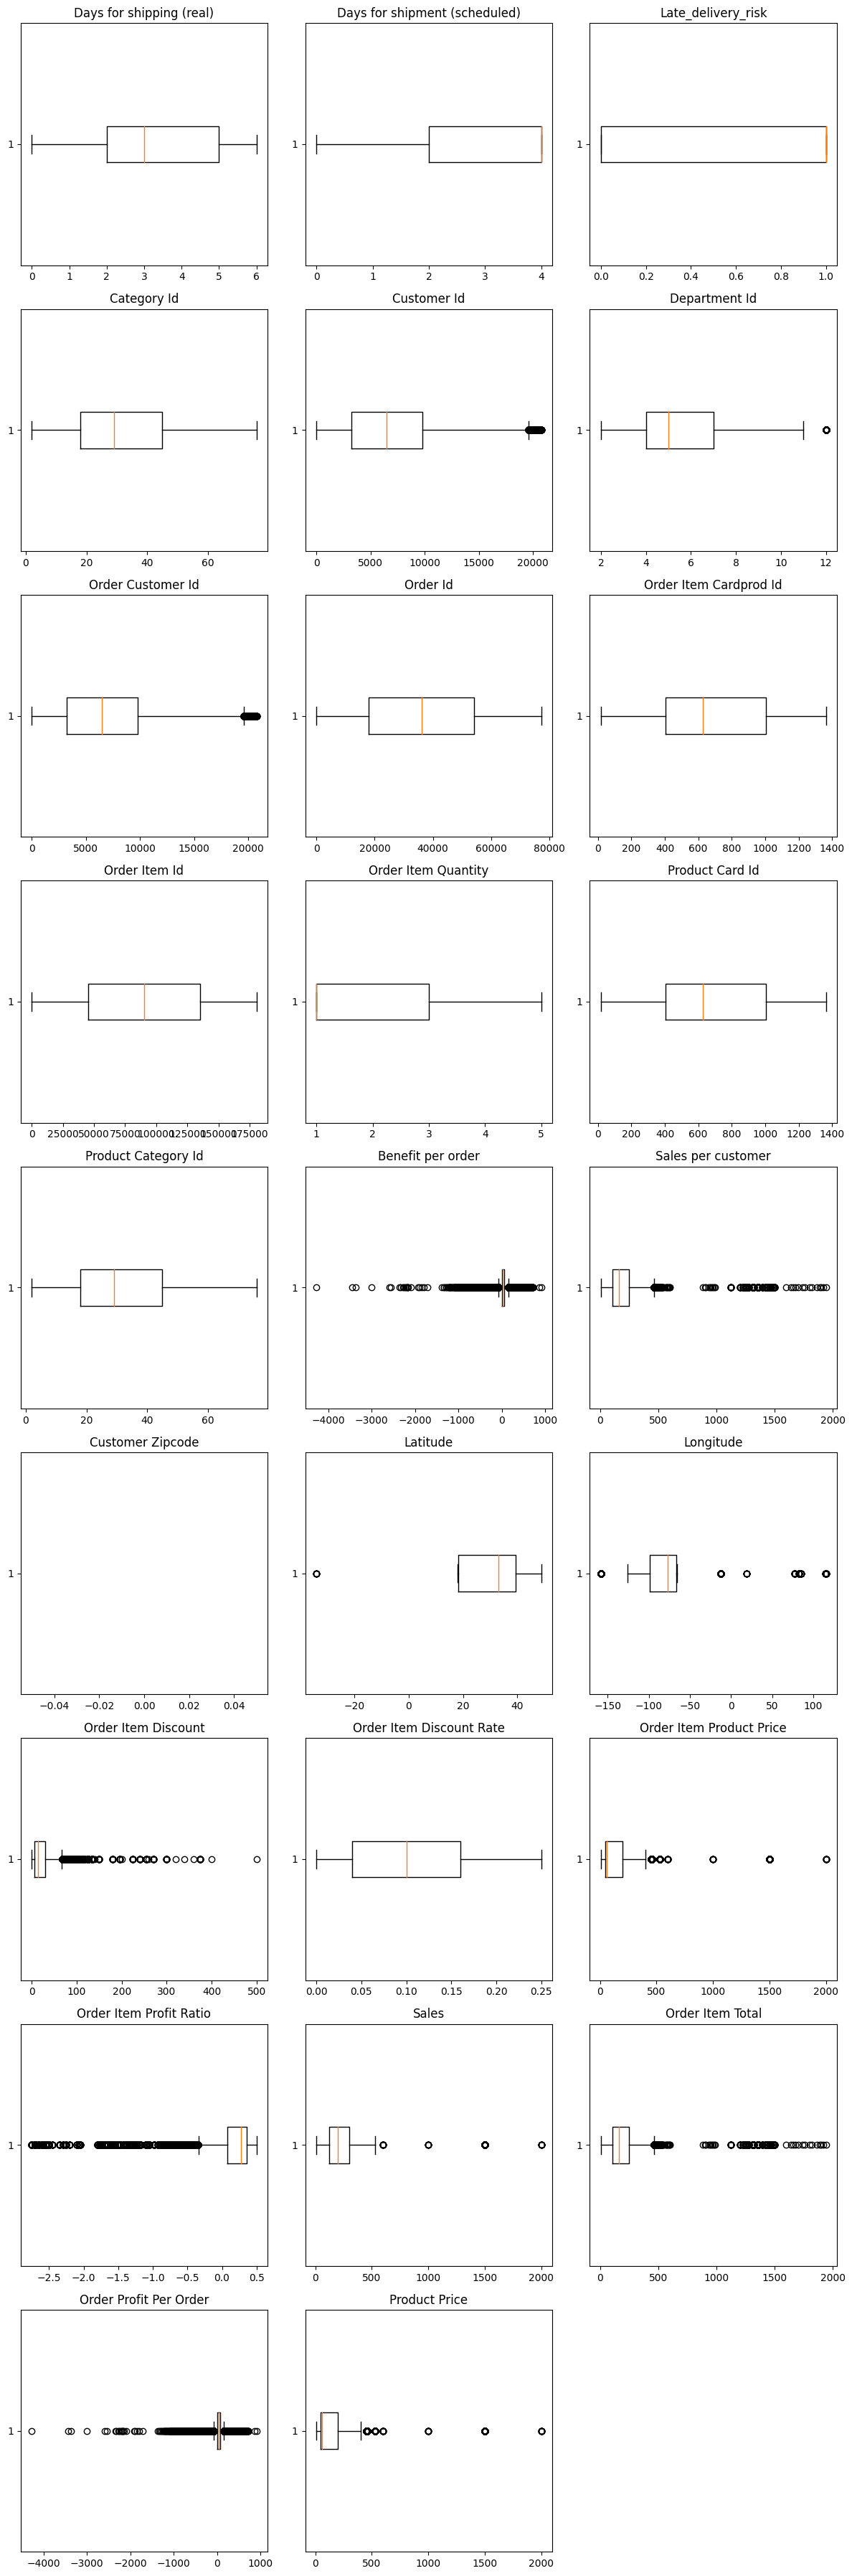

In [15]:
# Buat subplots
fig, ax = plt.subplots(num_rows, 3, figsize=(12, num_rows * 4))

# Counter untuk memilih kolom
cnt = 0

# Looping untuk membuat boxplot
for i in range(num_rows):
    for j in range(3):

        # Jika kolom habis, hapus subplot kosong
        if cnt >= len(colnames):
            fig.delaxes(ax[i, j])
            continue

        # Buat boxplot
        ax[i, j].boxplot(supply_df[colnames[cnt]], vert=False)
        ax[i, j].set_title(str(colnames[cnt]), fontdict={'fontsize': 12})

        # Increment counter
        cnt += 1

# Pastikan layout tidak bertabrakan
fig.tight_layout()

# Tampilkan plot
plt.show()

Dari boxplot di atas, kita mendapat beberapa informasi, antara lain:  

1. **Beberapa kolom tampak memiliki outlier, tetapi sebenarnya hanya rentang datanya yang luas**, sehingga tidak perlu dianggap sebagai outlier. Kolom-kolom tersebut adalah:  
   - `Order Id`  
   - `Order Customer Id`  
   - `Order Item Id`  
   - `Product Category Id`  

2. **Beberapa kolom lain juga memiliki nilai yang tampak seperti outlier, tetapi jika diperhatikan lebih lanjut, nilainya masih wajar dan tidak ekstrem**. Kolom-kolom tersebut adalah:  
   - `Order Item Quantity`  
   - `Order Item Product Price`  
   - `Sales`  

3. **Kolom-kolom selain yang disebutkan di atas memiliki outlier yang lebih signifikan**, sehingga mungkin perlu dilakukan penanganan lebih lanjut. Kolom-kolom tersebut adalah:  
   - `Benefit per order`  
   - `Order Profit Per Order`  
   - `Order Item Discount`  
   - `Order Item Discount Rate`  
   - `Sales per customer`  
   - `Order Item Total`  

Menggunakan boxplot kita dapat mendeteksi outlier pada kolom. Namun, untuk mendapatkan lokasi pasti dari outlier kita akan menggunakan **IQR filter**.

   # <b><font color='black'>Mendeteksi Outlier Menggunakan IQR Filter</font></b>
---
Mendeteksi outlier menggunakan IQR Filter dilakukan dengan menghitung Q1 (kuartil pertama) dan Q3 (kuartil ketiga), lalu menentukan IQR sebagai selisih antara Q3 dan Q1. Setelah itu, batas bawah dihitung dengan formula Q1-1.5×IQR, sedangkan batas atas dihitung dengan Q3+1.5×IQR. Data yang berada di luar rentang batas bawah dan atas ini dianggap sebagai outlier. Metode ini efektif untuk mendeteksi outlier tanpa terpengaruh oleh distribusi data.

![](https://docs.oracle.com/cloud/help/ja/pbcs_common/PFUSU/img/insights_iqr_example.jpg)

Read more: [IQR Filter](https://www.geeksforgeeks.org/how-to-use-pandas-filter-with-iqr/)

In [16]:
# function to detect outlier using IQR
def detect_outliers_iqr(data):

    # initialize list that contains the outliers
    outliers = []

    # sort data values
    data = sorted(data)

    # compute the q1
    q1 = np.percentile(data, 25)

    # compute the q3
    q3 = np.percentile(data, 75)

    # compute the IQR
    IQR = q3-q1

    # set the lower bound
    ## note that we can play with value 1.5 to widen or narrow the range
    lwr_bound = q1-(1.5*IQR)

    # set the upper bound
    ## note that we can play with value 1.5 to widen or narrow the range
    upr_bound = q3+(1.5*IQR)

    # print computed lower and upper bound of a particular column
    print("lower:",lwr_bound, "upper:", upr_bound)

    # for each data point, decide whether it falls below lower bound or above upper ground
    for i in data:

        if (i<lwr_bound or i>upr_bound):

            outliers.append(i)

    return outliers

In [17]:
# Deteksi Outliers

outlier_columns = []

for col in colnames:
    
    outlier = detect_outliers_iqr(supply_df[col])

    print(f"Jumlah outlier pada kolom '{col}' adalah {len(outlier)}\n")
    if len(outlier) > 0:
        outlier_columns.append(col)

lower: -2.5 upper: 9.5
Jumlah outlier pada kolom 'Days for shipping (real)' adalah 0

lower: -1.0 upper: 7.0
Jumlah outlier pada kolom 'Days for shipment (scheduled)' adalah 0

lower: -1.5 upper: 2.5
Jumlah outlier pada kolom 'Late_delivery_risk' adalah 0

lower: -22.5 upper: 85.5
Jumlah outlier pada kolom 'Category Id' adalah 0

lower: -6522.25 upper: 19559.75
Jumlah outlier pada kolom 'Customer Id' adalah 1198

lower: -0.5 upper: 11.5
Jumlah outlier pada kolom 'Department Id' adalah 362

lower: -6522.25 upper: 19559.75
Jumlah outlier pada kolom 'Order Customer Id' adalah 1198

lower: -36073.5 upper: 108274.5
Jumlah outlier pada kolom 'Order Id' adalah 0

lower: -498.5 upper: 1905.5
Jumlah outlier pada kolom 'Order Item Cardprod Id' adalah 0

lower: -90258.0 upper: 270778.0
Jumlah outlier pada kolom 'Order Item Id' adalah 0

lower: -2.0 upper: 6.0
Jumlah outlier pada kolom 'Order Item Quantity' adalah 0

lower: -498.5 upper: 1905.5
Jumlah outlier pada kolom 'Product Card Id' adalah 0


Berdasarkan deteksi outlier menggunakan metode Interquartile Range (IQR), beberapa kolom memiliki outlier signifikan. Namun, terdapat kolom dengan batas atas dan bawah bernilai 0 atau NaN, seperti 'Product Status' dan 'Customer Zipcode'. Tentu saja ini tidak masuk akal. Disini, kita akan menghapus kolom-kolom tersebut dari dataset

In [18]:
# Hapus kolom dengan batas bawah dan atas sama dengan 0
outlier_columns = [col for col in outlier_columns if (supply_df[col].min() != 0 or supply_df[col].max() != 0)]
outlier_columns

['Customer Id',
 'Department Id',
 'Order Customer Id',
 'Benefit per order',
 'Sales per customer',
 'Latitude',
 'Longitude',
 'Order Item Discount',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Sales',
 'Order Item Total',
 'Order Profit Per Order',
 'Product Price']

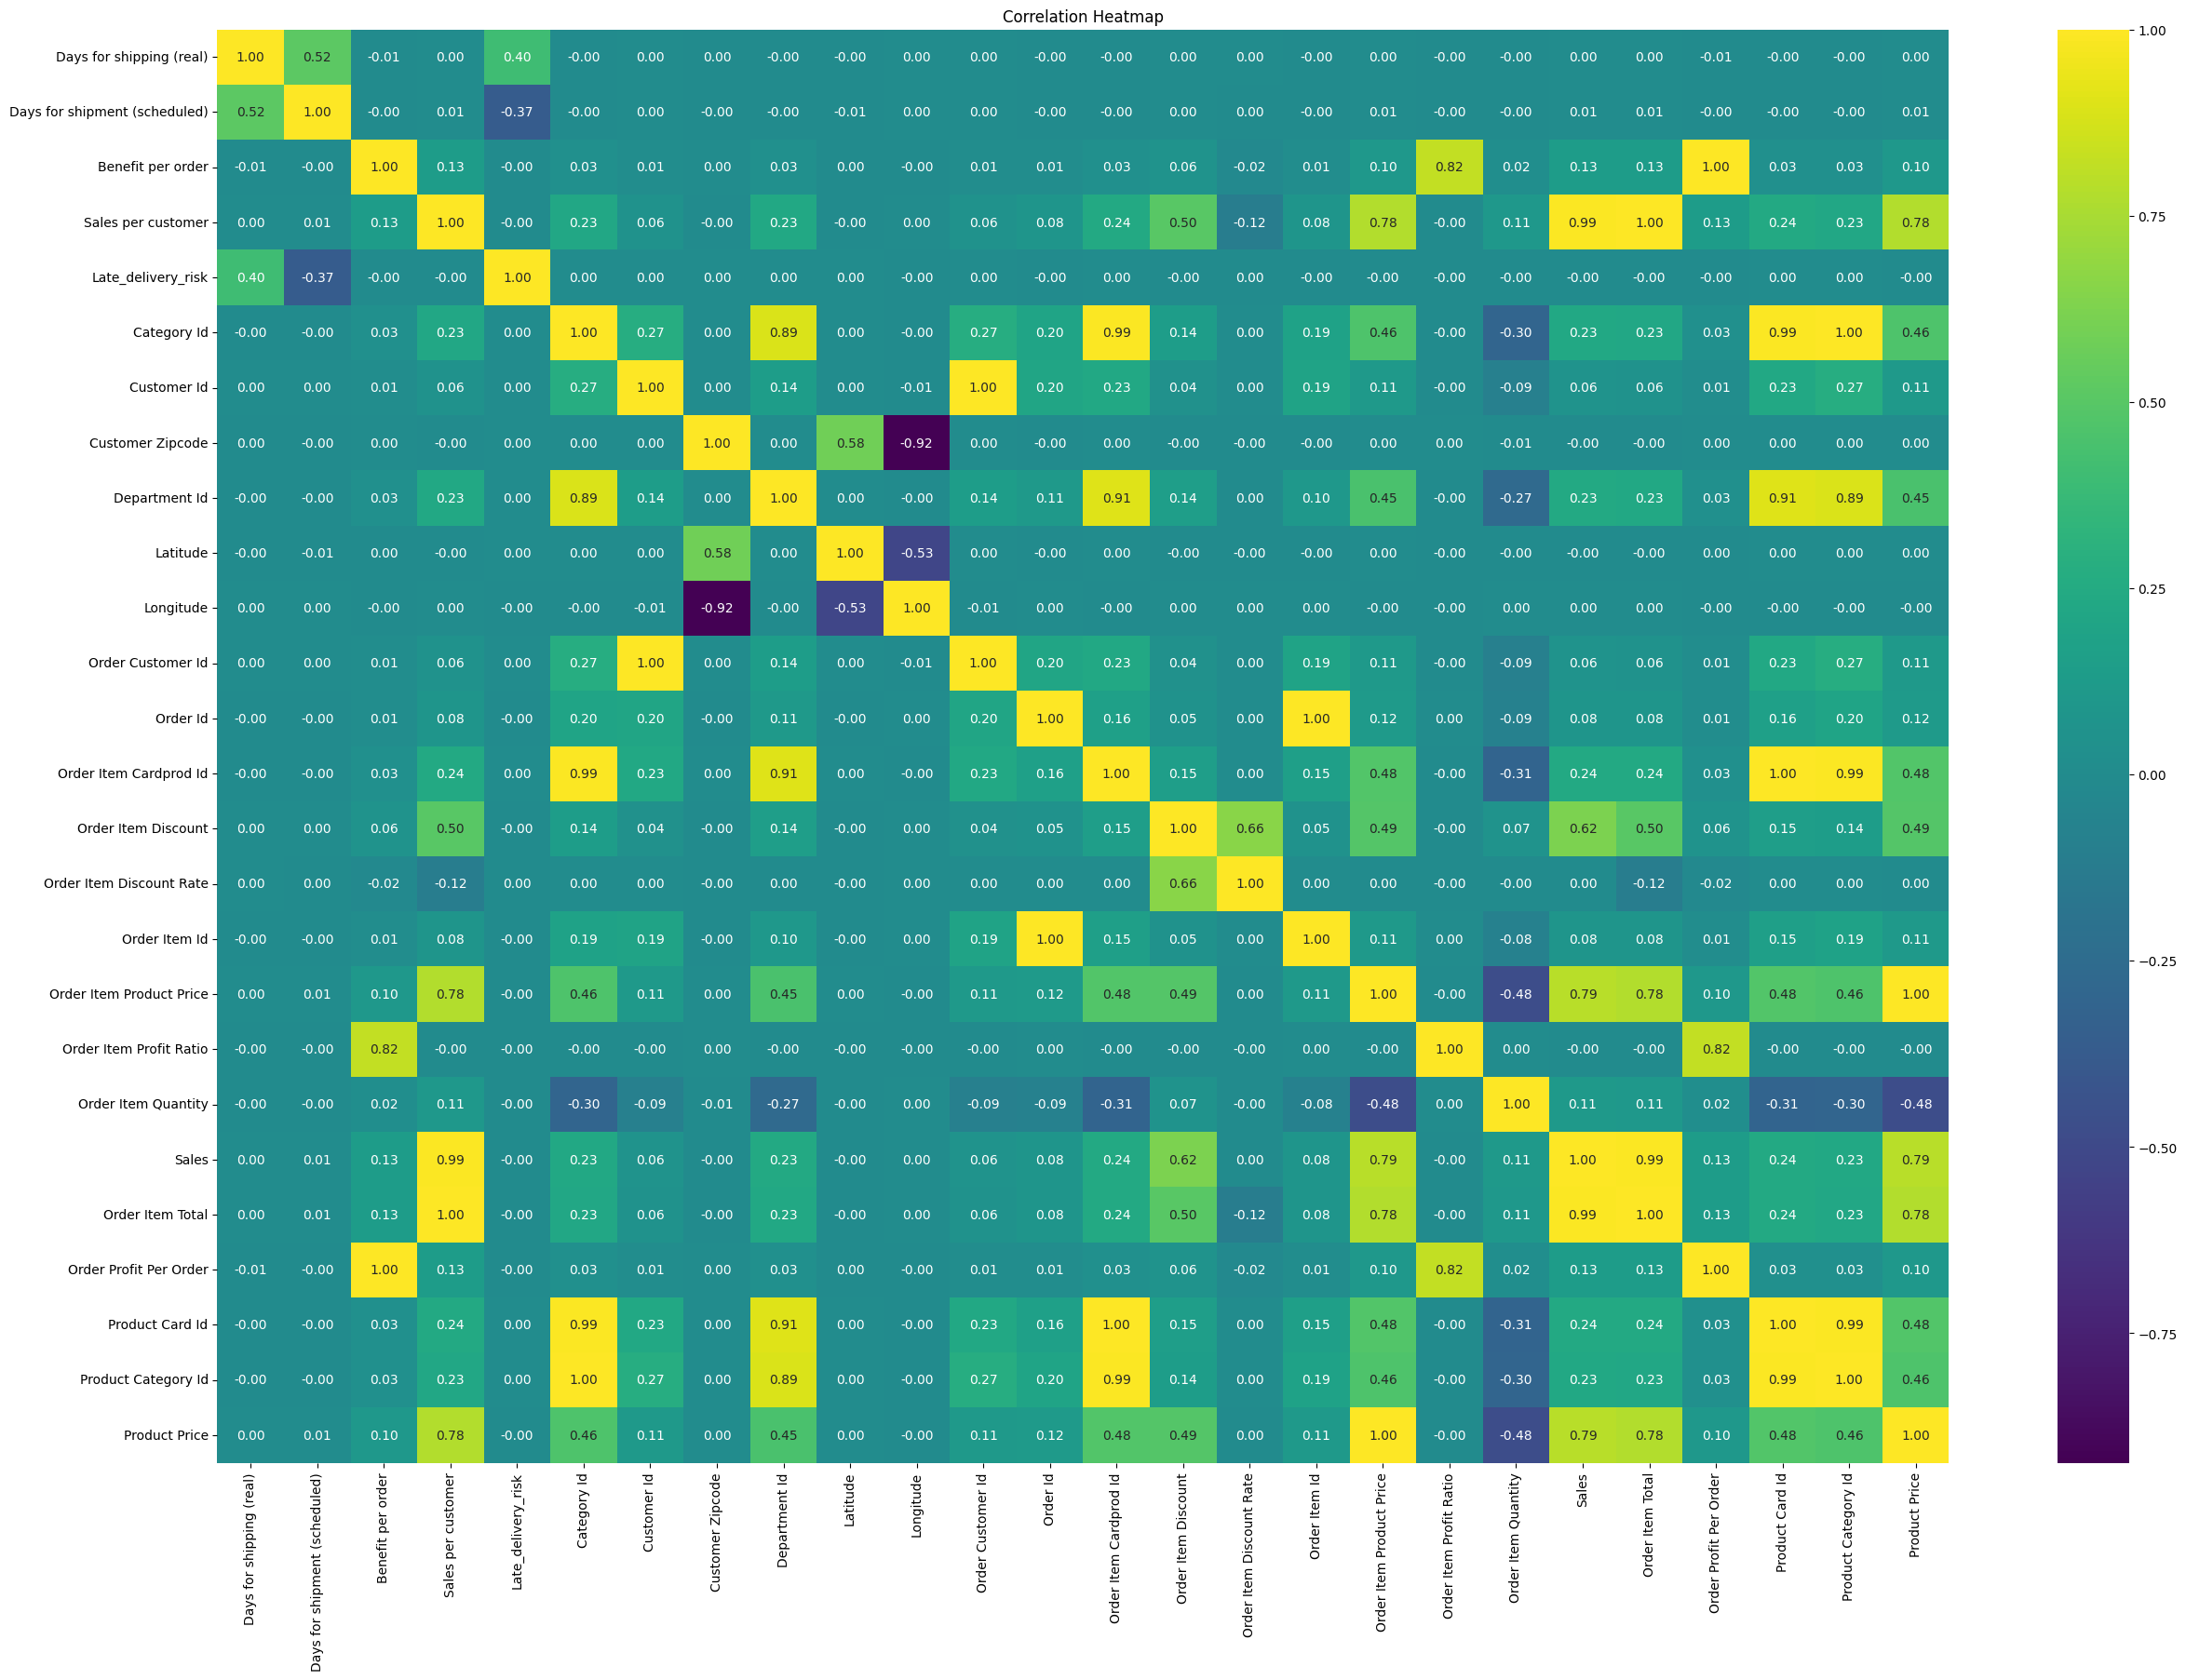

In [19]:
# Visualisasi Heatmap Untuk Melihat Korelasi Antar Fitur
df = pd.DataFrame(supply_df)

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Insights dari Heatmap:

Dari heatmap korelasi diatas, terdapat feature redudancy yaitu memiliki korelasi sempurna, salah satu dari keduanya bisa dihapus untuk menghindari multikolinearitas.
1. Kolom yang memiliki nilai serupa tetapi dengan metadata berbeda (kolom duplikat):

- Benefit per order dan Order Profit per order
- Sales per customer, dan Order Item Total
- Category ID dan Product Category ID
- Order Customer ID dan Customer ID
- Order ID dan Order Item ID
- Order Item Cardprod Id dan Product Card Id
- Benefit per order dan Order Profit per Order
- Product Price dan Order Item Product Price

2. Fitur yang tidak diperlukan (memiliki nilai null atau korelasi rendah):
- Product Description
- Product Status

3. Membagi dataset menjadi subset yang lebih kecil berdasarkan domain untuk mempermudah analisis dan pemodelan:
- Risiko Keterlambatan Pengiriman → Late_delivery_risk (0 atau 1)
- Status Pengiriman → Delivery Status (Advance shipping, Late delivery, dll.)
- Metode Pengiriman → Shipping Mode (Standard Class, First Class, Same Day, dll.)
- Jenis Pembayaran → Type (Cash, Debit, Transfer, dll.)

In [20]:
# Identifikasi redundansi fitur
supply_df[["Benefit per order", "Order Profit Per Order"]].head(5)

,Benefit per order,Order Profit Per Order
0,91.250000,91.250000
1,-249.089996,-249.089996
2,-247.779999,-247.779999
3,22.860001,22.860001
4,134.210007,134.210007


Redundansi fitur perlu dihilangkan karena fitur-fitur yang memiliki informasi serupa, seperti misalnya Benefit per order dan Order Profit Per Order dapat menyebabkan model menjadi overfitting dan kurang efisien. Selain itu, fitur yang redundant tidak menambah nilai informasi baru, hanya memperbesar kompleksitas data dan mempengaruhi performa algoritma secara negatif. Menghapus fitur redundant membantu menyederhanakan analisis dan meningkatkan akurasi model.

In [21]:
# Daftar kolom yang ingin di-drop untuk menghindari feature redundancy
columns_to_drop = [
    "Benefit per order", 
    "Sales per customer", 
    "Category Id", 
    "Order Customer Id", 
    "Order Item Id", 
    "Order Item Cardprod Id", 
    "Order Item Product Price"
]

# Looping untuk drop kolom
for col in columns_to_drop:
    supply_df.drop(col, axis=1, inplace=True)

# Cek hasilnya
print("Kolom yang tersisa setelah feature selection: ")
supply_df.head()

Kolom yang tersisa setelah feature selection: 


,Type,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,order date (DateOrders),Order Id,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,1/31/2018 22:56,77202,13.110000,0.04,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,1/13/2018 12:27,75939,16.389999,0.05,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,1/18/2018 12:27,Standard Class
2,CASH,4,4,Shipping on time,0,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,1/13/2018 12:06,75938,18.030001,0.06,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,1360,73,Smart watch,327.75,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,Advance shipping,0,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,CA,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,1/13/2018 11:45,75937,22.940001,0.07,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,1360,73,Smart watch,327.75,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,PR,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,1/13/2018 11:24,75936,29.500000,0.09,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,1/15/2018 11:24,Standard Class


In [22]:
# Sanity cek ukuran setelah menghapus redundansi fitur
supply_df.shape

(180519, 37)

   # <b><font color='black'>Data pre-processing</font></b>
---
Serangkaian langkah atau teknik yang dilakukan untuk mempersiapkan data mentah menjadi data yang siap digunakan dalam analisis data dan pemodelan.

Outline:
* Membagi Data Latih dan Data Uji
* Encoder
* Imputasi
* Standarisasi

   # <b><font color='black'>Train-Test Split</font></b>
---

- Kenapa?
1. Karena tidak mau overfit data training dan menghindari data leakage
2. Test data akan menjadi future data
3. Kita akan latih model ML di data training
4. Selanjutnya melakukan evaluasi di data testing

In [23]:
# Splitting Data
def extractInputOutput(data,
                       output_column_name):
    """
    Fungsi untuk memisahkan data input dan output
    :param data: <pandas dataframe> data seluruh sample
    :param output_column_name: <string> nama kolom output
    :return input_data: <pandas dataframe> data input
    :return output_data: <pandas series> data output
    """
    # buat output
    output_data = supply_df[output_column_name]
    
    # buat input
    input_data = supply_df.drop(output_column_name,
                           axis = 1)
    
    return input_data, output_data

In [24]:
# Jangan sampai salah urutan dalam penempatan return
output_column_name = ["Late_delivery_risk"]

X, y = extractInputOutput(data = supply_df,
                          output_column_name = output_column_name)

In [25]:
# Variabel Input
X.head(2)

,Type,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,order date (DateOrders),Order Id,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,Advance shipping,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,1/31/2018 22:56,77202,13.110000,0.04,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,Late delivery,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,1/13/2018 12:27,75939,16.389999,0.05,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,1/18/2018 12:27,Standard Class


In [26]:
# Variabel Target
y.head(2)

,Late_delivery_risk
0,0
1,1


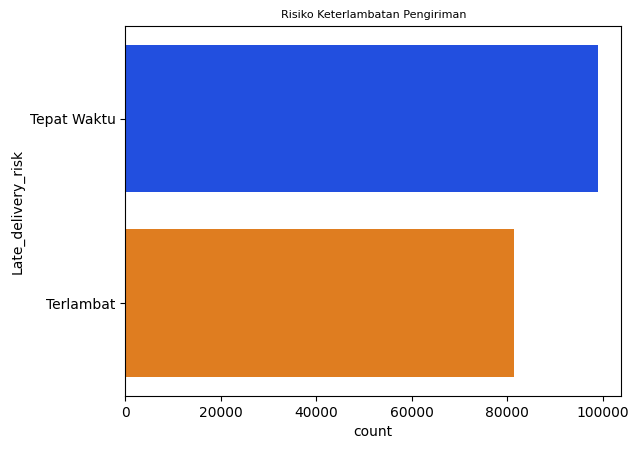

In [27]:
# Melihat proporsi data target
y['Late_delivery_risk'] = y['Late_delivery_risk'].map({
    0: 'Terlambat',
    1: 'Tepat Waktu',
})


def bar_chart(category, title):
    sns.countplot(data = y, y = y[category],order= y[category].value_counts().index, palette='bright')
    plt.title(title, size = 8)
    plt.show()

bar_chart("Late_delivery_risk","Risiko Keterlambatan Pengiriman")

Grafik menunjukkan bahwa pengiriman Tepat Waktu jauh lebih banyak dibandingkan Terlambat, ketidakseimbangan ini bisa menjadi perhatian karena model cenderung bias terhadap kelas mayoritas (Tepat Waktu) dan mungkin kesulitan mengenali kelas minoritas (Terlambat). Untuk mengatasi hal ini, teknik seperti SMOTE (Synthetic Minority Oversampling Technique) dapat digunakan untuk menyeimbangkan data dengan membuat sampel sintetis pada kelas minoritas.

In [28]:
y['Late_delivery_risk'] = y['Late_delivery_risk'].map({
    'Terlambat': 0,
    'Tepat Waktu': 1
})
y.head()

,Late_delivery_risk
0,0
1,1
2,0
3,0
4,0


# <b><font color='black'>Stratified K-Fold Function</font></b>
---
1. `kf` adalah objek untuk membagi data ke dalam K-Fold secara stratified.  
2. `n_splits` menentukan jumlah lipatan (folds) yang akan dibuat. Misalnya, `n_splits=10` artinya data akan dibagi menjadi 10 lipatan.  
3. `shuffle` adalah parameter untuk mengacak data sebelum membaginya ke dalam lipatan. Contoh `shuffle=True` artinya data akan diacak.  
4. `random_state` adalah kunci untuk mengontrol hasil pengacakan agar konsisten setiap kali proses dijalankan. Misalnya, `random_state=42` memastikan pembagian lipatan selalu sama.  
5. Output:  
   - Untuk setiap lipatan, StratifiedKFold mengembalikan indeks data training dan testing secara bergantian, memastikan distribusi kelas pada setiap lipatan tetap seimbang.  
6. Urutan dalam loop:  
   - Data akan terbagi menjadi training set dan testing set di setiap iterasi dengan mempertahankan proporsi kelas yang sama di setiap lipatan.  

> Read more: [StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html)

In [29]:
# Stratified K-Fold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# List untuk menyimpan hasil split
splits = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Simpan dalam list
    splits.append((X_train, X_test, y_train, y_test))

# Contoh mengakses fold pertama
X_train_fold1, X_test_fold1, y_train_fold1, y_test_fold1 = splits[0]

# Cek shape data fold pertama
print(f"X_train shape: {X_train_fold1.shape}, \ny_train shape: {y_train_fold1.shape}")
print(f"X_test shape: {X_test_fold1.shape}, \ny_test shape: {y_test_fold1.shape}")

X_train shape: (162467, 36), 
y_train shape: (162467, 1)
X_test shape: (18052, 36), 
y_test shape: (18052, 1)


Data telah terbagi menjadi training set dan testing set, di mana X_train berisi 162.467 sampel dengan 36 fitur untuk melatih model, sementara y_train adalah target yang sesuai. Testing set terdiri dari X_test dengan 18.052 sampel dan 36 fitur, serta y_test sebagai targetnya. Pembagian ini memastikan data untuk pengujian terpisah dari data pelatihan.

  # <b><font color='black'>Encoding</font></b>
---
Proses mengonversi data kategorikal menjadi bentuk numerik agar dapat digunakan dalam model pembelajaran mesin.  
- Ada 2 metode yang sering digunakan:  
1. Label Encoding: Mengonversi kategori menjadi angka integer berdasarkan levelnya.  
2. One Hot Encoding: Mengonversi kategori menjadi beberapa kolom biner (0/1) untuk setiap level.

Dalam hal ini, kami menggunakan Label Encoder untuk menghindari jumlah fitur yang terlalu banyak, karena dataset sudah memiliki banyak fitur sebelumnya, dan penggunaan One Hot Encoding akan menambah kompleksitas data secara signifikan.

  # <b><font color='black'>Categorical Columns: Label Encoder</font></b>
---
Banyak model pembelajaran mesin hanya menerima angka sebagai input. Oleh karena itu, kita perlu mengonversi semua fitur kategorikal menjadi angka.  

Salah satu metode untuk mengkodekan data kategorikal adalah dengan menggunakan **Label Encoder**.  
Label Encoder mengonversi setiap kategori unik dalam kolom menjadi angka integer. Nilai unik akan diberi label angka berdasarkan urutan kemunculannya. Misalnya, jika sebuah kolom memiliki level ["Green", "Red", "Black"], maka encoder akan mengubahnya menjadi [1, 2, 3].  

Berbeda dengan One Hot Encoding, Label Encoder lebih hemat memori karena tidak membuat kolom baru untuk setiap kategori.

![](https://substackcdn.com/image/fetch/f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2F6476f92b-cebf-4cea-8098-ebc92e2d6166_1326x705.jpeg)

Read more: [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

**Bedakan antara data kategorikal dengan numerikal**

In [30]:
#_get_numeric_data() hanya akan mengambil column berisikan integer dan float
# hati-hati dengan data kategoric yang berbentuk integer!!
X_test_numerical = X_test._get_numeric_data() 
X_train_numerical = X_train._get_numeric_data() 
X_numerical = X._get_numeric_data() 

In [31]:
# Sanity cek tipe data
X.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Delivery Status                   object
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Id                        int64
Customer Segment                  object
Customer State                    object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Latitude                         float64
Longitude                        float64
Market                            object
Order City                        object
Order Country                     object
order date (DateOrders)           object
Order Id                           int64
Order Item Discount              float64
Order Item Discount Rate         float64
Order Item Profit Ratio          float64
Order Item Quantity                int64
Sales           

In [32]:
# Memisahkan data numerik dan menampilkan data kategorik 
X_train_categorical = X_train.drop(list(X_train_numerical.columns.values), axis=1)
X_test_categorical = X_test.drop(list(X_test_numerical.columns.values), axis=1)
X_categorical = X.drop(list(X_numerical.columns.values), axis=1)
X_categorical.head()

,Type,Delivery Status,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Department Name,Market,Order City,Order Country,order date (DateOrders),Order Region,Order State,Order Status,Product Name,shipping date (DateOrders),Shipping Mode
0,DEBIT,Advance shipping,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bekasi,Indonesia,1/31/2018 22:56,Southeast Asia,Java Occidental,COMPLETE,Smart watch,2/3/2018 22:56,Standard Class
1,TRANSFER,Late delivery,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bikaner,India,1/13/2018 12:27,South Asia,Rajastán,PENDING,Smart watch,1/18/2018 12:27,Standard Class
2,CASH,Shipping on time,Sporting Goods,San Jose,EE. UU.,Consumer,CA,Fitness,Pacific Asia,Bikaner,India,1/13/2018 12:06,South Asia,Rajastán,CLOSED,Smart watch,1/17/2018 12:06,Standard Class
3,DEBIT,Advance shipping,Sporting Goods,Los Angeles,EE. UU.,Home Office,CA,Fitness,Pacific Asia,Townsville,Australia,1/13/2018 11:45,Oceania,Queensland,COMPLETE,Smart watch,1/16/2018 11:45,Standard Class
4,PAYMENT,Advance shipping,Sporting Goods,Caguas,Puerto Rico,Corporate,PR,Fitness,Pacific Asia,Townsville,Australia,1/13/2018 11:24,Oceania,Queensland,PENDING_PAYMENT,Smart watch,1/15/2018 11:24,Standard Class


In [33]:
# Cek missing values kolom kategorik
categorical_column = list(X_test_categorical.columns.values)
X_categorical.isna().sum()

Type                          0
Delivery Status               0
Category Name                 0
Customer City                 0
Customer Country              0
Customer Segment              0
Customer State                0
Department Name               0
Market                        0
Order City                    0
Order Country                 0
order date (DateOrders)       0
Order Region                  0
Order State                   0
Order Status                  0
Product Name                  0
shipping date (DateOrders)    0
Shipping Mode                 0
dtype: int64

In [34]:
# Cek missing values kolom numerik
X_numerical.isna().sum()

Days for shipping (real)         0
Days for shipment (scheduled)    0
Customer Id                      0
Customer Zipcode                 3
Department Id                    0
Latitude                         0
Longitude                        0
Order Id                         0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Profit Ratio          0
Order Item Quantity              0
Sales                            0
Order Item Total                 0
Order Profit Per Order           0
Product Card Id                  0
Product Category Id              0
Product Price                    0
dtype: int64

In [35]:
# Konversi kolom dalam format date
X_train_categorical["order date (DateOrders)"] = pd.to_datetime(X_train_categorical["order date (DateOrders)"])
X_train_categorical["shipping date (DateOrders)"] = pd.to_datetime(X_train_categorical["shipping date (DateOrders)"])

X_test_categorical["order date (DateOrders)"] = pd.to_datetime(X_test_categorical["order date (DateOrders)"])
X_test_categorical["shipping date (DateOrders)"] = pd.to_datetime(X_test_categorical["shipping date (DateOrders)"])

X_categorical["order date (DateOrders)"] = pd.to_datetime(X_categorical["order date (DateOrders)"])
X_categorical["shipping date (DateOrders)"] = pd.to_datetime(X_categorical["shipping date (DateOrders)"])

# Konversi Order Date - X_train
X_train_categorical["Order_Year"] = X_train_categorical["order date (DateOrders)"].dt.year
X_train_categorical["Order_Month"] = X_train_categorical["order date (DateOrders)"].dt.month
X_train_categorical["Order_Day"] = X_train_categorical["order date (DateOrders)"].dt.day

# Konversi Shipping Date - X_train
X_train_categorical["Shipping_Year"] = X_train_categorical["shipping date (DateOrders)"].dt.year
X_train_categorical["Shipping_Month"] = X_train_categorical["shipping date (DateOrders)"].dt.month
X_train_categorical["Shipping_Day"] = X_train_categorical["shipping date (DateOrders)"].dt.day

# Hapus kolom datetime asli - X_train
X_train_categorical.drop(columns=["order date (DateOrders)", "shipping date (DateOrders)"], inplace=True)

# Konversi Order Date - X_test
X_test_categorical["Order_Year"] = X_test_categorical["order date (DateOrders)"].dt.year
X_test_categorical["Order_Month"] = X_test_categorical["order date (DateOrders)"].dt.month
X_test_categorical["Order_Day"] = X_test_categorical["order date (DateOrders)"].dt.day

# Konversi Shipping Date - X_test
X_test_categorical["Shipping_Year"] = X_test_categorical["shipping date (DateOrders)"].dt.year
X_test_categorical["Shipping_Month"] = X_test_categorical["shipping date (DateOrders)"].dt.month
X_test_categorical["Shipping_Day"] = X_test_categorical["shipping date (DateOrders)"].dt.day

# Hapus kolom datetime asli - X_test
X_test_categorical.drop(columns=["order date (DateOrders)", "shipping date (DateOrders)"], inplace=True)

# Konversi Order Date - X
X_categorical["Order_Year"] = X_categorical["order date (DateOrders)"].dt.year
X_categorical["Order_Month"] = X_categorical["order date (DateOrders)"].dt.month
X_categorical["Order_Day"] = X_categorical["order date (DateOrders)"].dt.day

# Konversi Shipping Date - X
X_categorical["Shipping_Year"] = X_categorical["shipping date (DateOrders)"].dt.year
X_categorical["Shipping_Month"] = X_categorical["shipping date (DateOrders)"].dt.month
X_categorical["Shipping_Day"] = X_categorical["shipping date (DateOrders)"].dt.day

# Hapus kolom datetime asli - X
X_categorical.drop(columns=["order date (DateOrders)", "shipping date (DateOrders)"], inplace=True)

In [36]:
# Sanity cek tipe data
X_categorical.dtypes

Type                object
Delivery Status     object
Category Name       object
Customer City       object
Customer Country    object
Customer Segment    object
Customer State      object
Department Name     object
Market              object
Order City          object
Order Country       object
Order Region        object
Order State         object
Order Status        object
Product Name        object
Shipping Mode       object
Order_Year           int32
Order_Month          int32
Order_Day            int32
Shipping_Year        int32
Shipping_Month       int32
Shipping_Day         int32
dtype: object

In [37]:
# Setelah di konversi dalam format date
X_train_categorical.head()

,Type,Delivery Status,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Department Name,Market,Order City,Order Country,Order Region,Order State,Order Status,Product Name,Shipping Mode,Order_Year,Order_Month,Order_Day,Shipping_Year,Shipping_Month,Shipping_Day
0,DEBIT,Advance shipping,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bekasi,Indonesia,Southeast Asia,Java Occidental,COMPLETE,Smart watch,Standard Class,2018,1,31,2018,2,3
2,CASH,Shipping on time,Sporting Goods,San Jose,EE. UU.,Consumer,CA,Fitness,Pacific Asia,Bikaner,India,South Asia,Rajastán,CLOSED,Smart watch,Standard Class,2018,1,13,2018,1,17
3,DEBIT,Advance shipping,Sporting Goods,Los Angeles,EE. UU.,Home Office,CA,Fitness,Pacific Asia,Townsville,Australia,Oceania,Queensland,COMPLETE,Smart watch,Standard Class,2018,1,13,2018,1,16
5,TRANSFER,Shipping canceled,Sporting Goods,Tonawanda,EE. UU.,Consumer,NY,Fitness,Pacific Asia,Toowoomba,Australia,Oceania,Queensland,CANCELED,Smart watch,Standard Class,2018,1,13,2018,1,19
6,DEBIT,Late delivery,Sporting Goods,Caguas,Puerto Rico,Home Office,PR,Fitness,Pacific Asia,Guangzhou,China,Eastern Asia,Guangdong,COMPLETE,Smart watch,First Class,2018,1,13,2018,1,15


In [38]:
# LabelEncoder untuk setiap kolom kategorik data training
label_encoders = {}
for col in X_train_categorical.columns:
    if col not in ['Order_Year', 'Order_Month', 'Order_Day', 'Shipping_Year', 'Shipping_Month', 'Shipping_Day']:
        X_train_categorical[col] = X_train_categorical[col].astype(str)  # Konversi ke string
        le = LabelEncoder()
        X_train_categorical[col] = le.fit_transform(X_train_categorical[col])
        label_encoders[col] = le  # Simpan encoder jika diperlukan untuk inverse transform

X_train_categorical.head()

,Type,Delivery Status,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Department Name,Market,Order City,Order Country,Order Region,Order State,Order Status,Product Name,Shipping Mode,Order_Year,Order_Month,Order_Day,Shipping_Year,Shipping_Month,Shipping_Day
0,1,0,40,66,1,0,36,4,3,331,70,15,473,2,78,3,2018,1,31,2018,2,3
2,0,3,40,452,0,0,5,4,3,390,69,13,839,1,78,3,2018,1,13,2018,1,17
3,1,0,40,285,0,2,5,4,3,3219,8,11,833,2,78,3,2018,1,13,2018,1,16
5,3,2,40,505,0,0,31,4,3,3200,8,11,833,0,78,3,2018,1,13,2018,1,19
6,1,1,40,66,1,2,36,4,3,1233,31,7,384,2,78,0,2018,1,13,2018,1,15


In [39]:
# LabelEncoder untuk setiap kolom kategorik data testing
label_encoders = {}
for col in X_test_categorical.columns:
    if col not in ['Order_Year', 'Order_Month', 'Order_Day', 'Shipping_Year', 'Shipping_Month', 'Shipping_Day']:
        X_test_categorical[col] = X_test_categorical[col].astype(str)  # Konversi ke string
        le = LabelEncoder()
        X_test_categorical[col] = le.fit_transform(X_test_categorical[col])
        label_encoders[col] = le  # Simpan encoder jika diperlukan untuk inverse transform

X_test_categorical.head()

,Type,Delivery Status,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Department Name,Market,Order City,Order Country,Order Region,Order State,Order Status,Product Name,Shipping Mode,Order_Year,Order_Month,Order_Day,Shipping_Year,Shipping_Month,Shipping_Day
1,3,1,40,65,1,0,34,4,3,311,60,13,727,5,78,3,2018,1,13,2018,1,18
4,2,0,40,65,1,1,34,4,3,2492,8,11,721,6,78,3,2018,1,13,2018,1,15
8,0,1,40,65,1,1,34,4,3,956,28,7,344,1,78,2,2018,1,13,2018,1,16
35,2,1,40,65,1,1,34,4,3,2293,120,15,803,6,78,0,2018,1,13,2018,1,15
44,1,0,40,175,0,0,3,4,3,450,8,11,846,2,78,3,2018,1,12,2018,1,14


In [40]:
# LabelEncoder untuk setiap kolom kategorik variabel input
label_encoders = {}
for col in X_categorical.columns:
    if col not in ['Order_Year', 'Order_Month', 'Order_Day', 'Shipping_Year', 'Shipping_Month', 'Shipping_Day']:
        X_categorical[col] = X_categorical[col].astype(str)  # Konversi ke string
        le = LabelEncoder()
        X_categorical[col] = le.fit_transform(X_categorical[col])
        label_encoders[col] = le  # Simpan encoder jika diperlukan untuk inverse transform

X_categorical.head()

,Type,Delivery Status,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Department Name,Market,Order City,Order Country,Order Region,Order State,Order Status,Product Name,Shipping Mode,Order_Year,Order_Month,Order_Day,Shipping_Year,Shipping_Month,Shipping_Day
0,1,0,40,66,1,0,36,4,3,331,70,15,475,2,78,3,2018,1,31,2018,2,3
1,3,1,40,66,1,0,36,4,3,391,69,13,841,5,78,3,2018,1,13,2018,1,18
2,0,3,40,452,0,0,5,4,3,391,69,13,841,1,78,3,2018,1,13,2018,1,17
3,1,0,40,285,0,2,5,4,3,3226,8,11,835,2,78,3,2018,1,13,2018,1,16
4,2,0,40,66,1,1,36,4,3,3226,8,11,835,6,78,3,2018,1,13,2018,1,15


  # <b><font color='black'>Join Numerical dan Categorical Data</font></b>
---
- Data numerik & kategorik harus disatukan kembali
- Penyatuan dengan pd.concat

In [41]:
X_train_concat = pd.concat([X_train_numerical,
                            X_train_categorical],
                           axis = 1)
X_train_concat.head()

,Days for shipping (real),Days for shipment (scheduled),Customer Id,Customer Zipcode,Department Id,Latitude,Longitude,Order Id,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Card Id,Product Category Id,Product Price,Type,Delivery Status,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Department Name,Market,Order City,Order Country,Order Region,Order State,Order Status,Product Name,Shipping Mode,Order_Year,Order_Month,Order_Day,Shipping_Year,Shipping_Month,Shipping_Day
0,3,4,20755,725.0,2,18.251453,-66.037056,77202,13.110000,0.04,0.29,1,327.75,314.640015,91.250000,1360,73,327.75,1,0,40,66,1,0,36,4,3,331,70,15,473,2,78,3,2018,1,31,2018,2,3
2,4,4,19491,95125.0,2,37.292233,-121.881279,75938,18.030001,0.06,-0.80,1,327.75,309.720001,-247.779999,1360,73,327.75,0,3,40,452,0,0,5,4,3,390,69,13,839,1,78,3,2018,1,13,2018,1,17
3,3,4,19490,90027.0,2,34.125946,-118.291016,75937,22.940001,0.07,0.08,1,327.75,304.809998,22.860001,1360,73,327.75,1,0,40,285,0,2,5,4,3,3219,8,11,833,2,78,3,2018,1,13,2018,1,16
5,6,4,19488,14150.0,2,43.013969,-78.879066,75935,32.779999,0.10,0.06,1,327.75,294.980011,18.580000,1360,73,327.75,3,2,40,505,0,0,31,4,3,3200,8,11,833,0,78,3,2018,1,13,2018,1,19
6,2,1,19487,725.0,2,18.242538,-66.037056,75934,39.330002,0.12,0.33,1,327.75,288.420013,95.180000,1360,73,327.75,1,1,40,66,1,2,36,4,3,1233,31,7,384,2,78,0,2018,1,13,2018,1,15


In [42]:
X_train_concat.dtypes

Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Customer Id                        int64
Customer Zipcode                 float64
Department Id                      int64
Latitude                         float64
Longitude                        float64
Order Id                           int64
Order Item Discount              float64
Order Item Discount Rate         float64
Order Item Profit Ratio          float64
Order Item Quantity                int64
Sales                            float64
Order Item Total                 float64
Order Profit Per Order           float64
Product Card Id                    int64
Product Category Id                int64
Product Price                    float64
Type                               int64
Delivery Status                    int64
Category Name                      int64
Customer City                      int64
Customer Country                   int64
Customer Segment                   int64
Customer State  

  # <b><font color='black'>Data Imputasi</font></b>
---
Proses pengisian data yang kosong (NaN)
- Ada 2 hal yang diperhatikan:
1. Numerical Imputation
2. Categorical Imputation

  # <b><font color='black'>KNN Imputer</font></b>
---

KNN Imputer adalah metode imputasi yang menggunakan algoritma k-Nearest Neighbors (k-NN) untuk menangani nilai yang hilang (missing values) dalam dataset. Imputer ini menggantikan nilai yang hilang dengan nilai rata-rata atau nilai tertentu dari k tetangga terdekatnya, yang ditentukan berdasarkan metrik jarak seperti Euclidean atau Manhattan distance.

Read more: [KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html)

In [43]:
# Pastikan Customer Zipcode bertipe numerik
X_numerical["Customer Zipcode"] = pd.to_numeric(X_numerical["Customer Zipcode"], errors='coerce')
X_train_numerical["Customer Zipcode"] = pd.to_numeric(X_train_numerical["Customer Zipcode"], errors='coerce')

# Inisialisasi KNN Imputer (k=5 bisa disesuaikan)
imputer = KNNImputer(n_neighbors=5)

# Imputasi hanya untuk kolom Customer Zipcode
X_numerical["Customer Zipcode"] = imputer.fit_transform(X_numerical[["Customer Zipcode"]])
X_train_numerical["Customer Zipcode"] = imputer.fit_transform(X_train_numerical[["Customer Zipcode"]])

In [44]:
print(f"X_train_concat shape: {X_train_concat.shape}")
print(f"y shape: {y_train.shape}")

# Output: data menjadi seimbang

X_train_concat shape: (162468, 40)
y shape: (162468, 1)


  # <b><font color='black'>Standardizing Variables</font></b>
---

- Menyamakan skala dari variabel input
- fit: imputer agar mengetahui mean dan standar deviasi dari setiap kolom
- transform: isi data dengan value yang sudah dinormalisasi
- output dari transform berupa pandas dataframe
- normalize dikeluarkan karena akan digunakan pada data test

In [45]:
# Fungsi Standarisasi Data
def standardizerData(data):
    """
    Fungsi untuk melakukan standarisasi data
    :param data: <pandas dataframe> sampel data
    :return standardized_data: <pandas dataframe> sampel data standard
    :return standardizer: method untuk standardisasi data
    """
    data_columns = data.columns  # agar nama kolom tidak hilang
    data_index = data.index  # agar index tidak hilang

    # buat (fit) standardizer
    standardizer = StandardScaler()
    standardizer.fit(data)

    # transform data
    standardized_data_raw = standardizer.transform(data)
    standardized_data = pd.DataFrame(standardized_data_raw, columns=data_columns, index=data_index)

    return standardized_data, standardizer

# Ambil hanya kolom numerik dari train dan test dataset
numeric_columns = X_train_numerical.select_dtypes(include=['number']).columns
X_train_numeric_data = X_train_numerical[numeric_columns]
X_test_numeric_data = X_test_numerical[numeric_columns]
X_numeric_data = X_numerical[numeric_columns]

# Standarisasi Data
X_train_numeric_scaled_df, scaler = standardizerData(X_train_numeric_data)
X_test_numeric_scaled_df, _ = standardizerData(X_test_numeric_data)
X_numeric_scaled_df, _ = standardizerData(X_numeric_data)

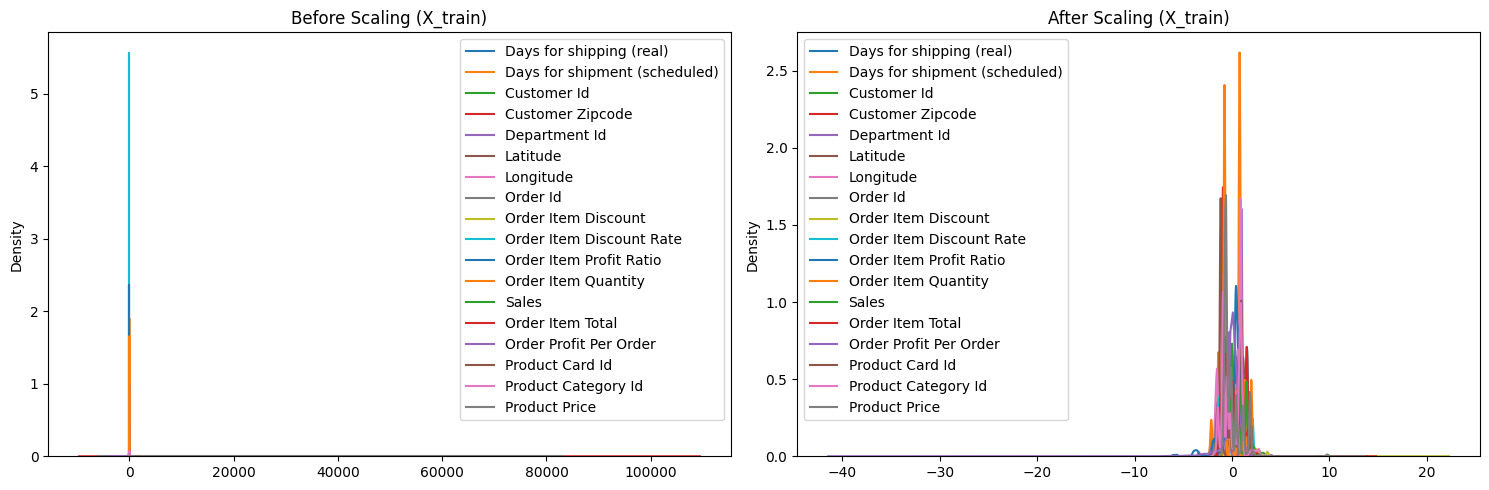

In [46]:
# Visualisasi distribusi sebelum dan sesudah scaling X_train
plt.figure(figsize=(15, 5))

# Plot Before Scaling (X_train)
plt.subplot(121)
for column in numeric_columns:
    sns.distplot(X_train_numeric_data[column], hist=False, label=column)
plt.title('Before Scaling (X_train)')
plt.xlabel('')
plt.legend()

# Plot After Scaling (X_train)
plt.subplot(122)
for column in numeric_columns:
    sns.distplot(X_train_numeric_scaled_df[column], hist=False, label=column)
plt.title('After Scaling (X_train)')
plt.xlabel('')
plt.legend()

plt.tight_layout()
plt.show()

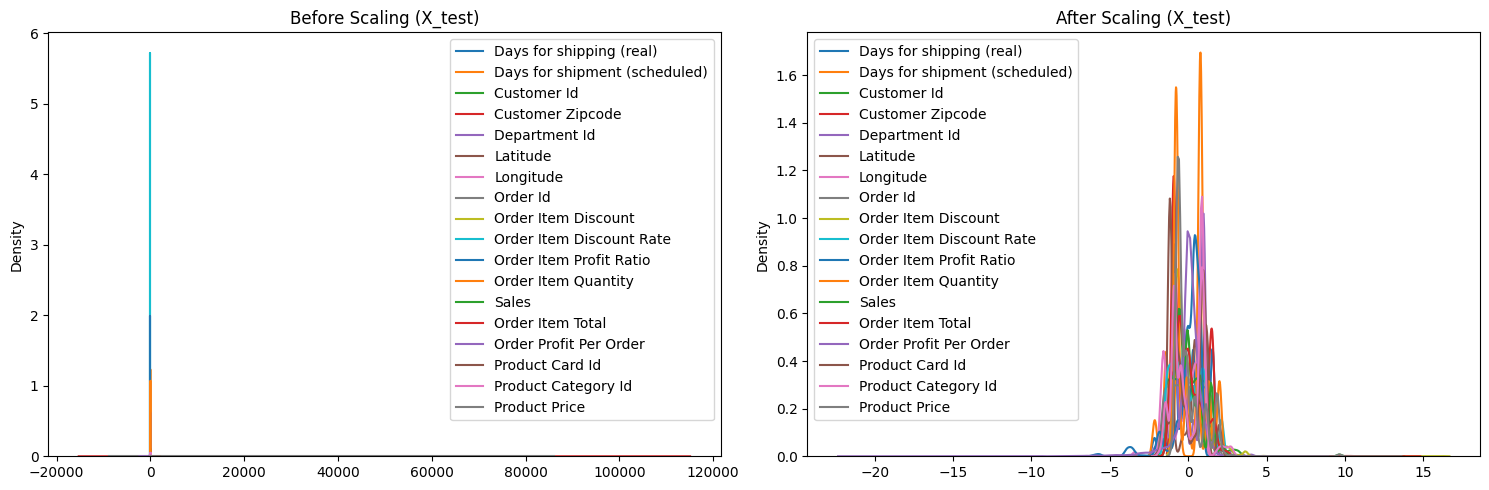

In [47]:
# Visualisasi distribusi sebelum dan sesudah scaling X_test
plt.figure(figsize=(15, 5))

# Plot Before Scaling (X_test)
plt.subplot(121)
for column in numeric_columns:
    sns.distplot(X_test_numeric_data[column], hist=False, label=column)
plt.title('Before Scaling (X_test)')
plt.xlabel('')
plt.legend()

# Plot After Scaling (X_test)
plt.subplot(122)
for column in numeric_columns:
    sns.distplot(X_test_numeric_scaled_df[column], hist=False, label=column)
plt.title('After Scaling (X_test)')
plt.xlabel('')
plt.legend()

plt.tight_layout()
plt.show()

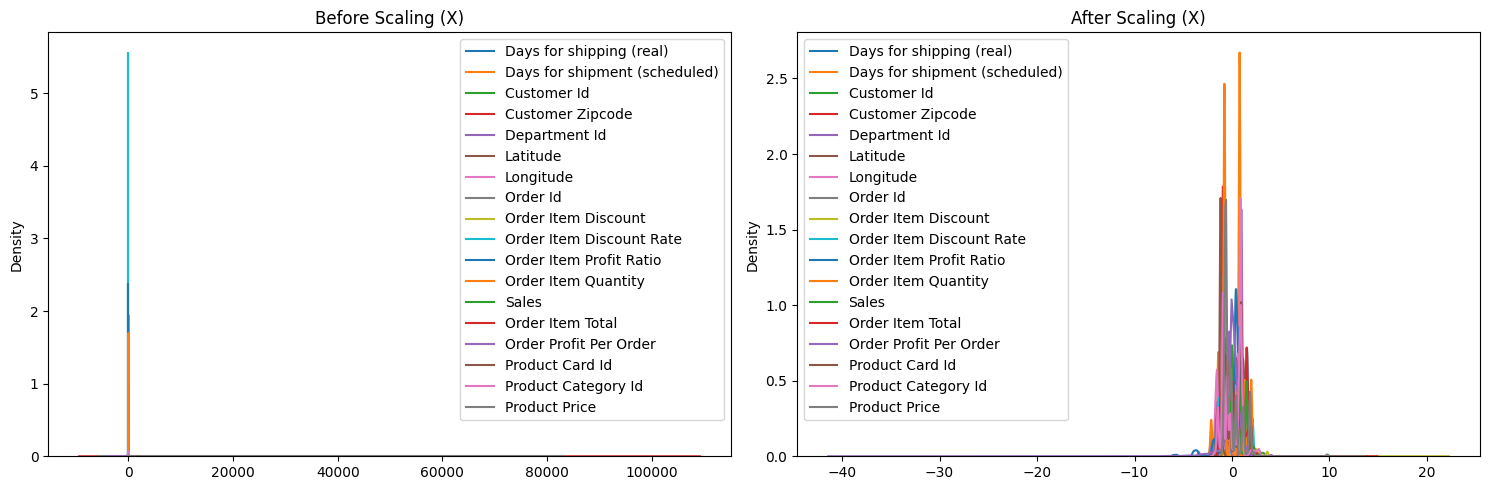

In [48]:
# Visualisasi distribusi sebelum dan sesudah scaling X
plt.figure(figsize=(15, 5))

# Plot Before Scaling (X_test)
plt.subplot(121)
for column in numeric_columns:
    sns.distplot(X_numeric_data[column], hist=False, label=column)
plt.title('Before Scaling (X)')
plt.xlabel('')
plt.legend()

# Plot After Scaling (X_test)
plt.subplot(122)
for column in numeric_columns:
    sns.distplot(X_numeric_scaled_df[column], hist=False, label=column)
plt.title('After Scaling (X)')
plt.xlabel('')
plt.legend()

plt.tight_layout()
plt.show()

In [49]:
# Dataset setelah dilakukan standarisasi
X_train_clean, standardizer = standardizerData(data = X_train_numerical)
X_test_clean, standardizer = standardizerData(data = X_test_numerical)
X_clean, standardizer = standardizerData(data = X_numerical)
X_clean.head()

,Days for shipping (real),Days for shipment (scheduled),Customer Id,Customer Zipcode,Department Id,Latitude,Longitude,Order Id,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Card Id,Product Category Id,Product Price
0,-0.306491,0.777152,3.378318,-0.937512,-2.113536,-1.168631,0.880813,1.947231,-0.346534,-0.875782,0.362801,-0.775836,0.93729,1.095708,0.663343,1.983945,2.630978,1.334822
1,0.925251,0.777152,3.074924,-0.937512,-2.113536,-1.165778,0.880812,1.887218,-0.196082,-0.733767,-1.972275,-0.775836,0.93729,1.068384,-2.595582,1.983945,2.630978,1.334822
2,0.309380,0.777152,3.074684,1.577002,-2.113536,0.771609,-1.724690,1.887170,-0.120855,-0.591751,-1.972275,-0.775836,0.93729,1.054722,-2.583038,1.983945,2.630978,1.334822
3,-0.306491,0.777152,3.074443,1.441207,-2.113536,0.448967,-1.557181,1.887123,0.104366,-0.449736,-0.087076,-0.775836,0.93729,1.013820,0.008474,1.983945,2.630978,1.334822
4,-0.922361,0.777152,3.074203,-0.937512,-2.113536,-1.168395,0.880813,1.887075,0.405271,-0.165706,0.705564,-0.775836,0.93729,0.959174,1.074706,1.983945,2.630978,1.334822


In [50]:
# Gabungkan seluruh data yang sudah distandarisasi X_train
X_train = pd.concat([X_train_clean,
                            X_train_categorical],
                           axis = 1)
X_train.head()

,Days for shipping (real),Days for shipment (scheduled),Customer Id,Customer Zipcode,Department Id,Latitude,Longitude,Order Id,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Card Id,Product Category Id,Product Price,Type,Delivery Status,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Department Name,Market,Order City,Order Country,Order Region,Order State,Order Status,Product Name,Shipping Mode,Order_Year,Order_Month,Order_Day,Shipping_Year,Shipping_Month,Shipping_Day
0,-0.306756,0.777526,3.380738,-0.937373,-2.116049,-1.168929,0.880757,1.948256,-0.347678,-0.876460,0.361723,-0.775837,0.938178,1.097137,0.662530,1.983268,2.631008,1.335536,1,0,40,66,1,0,36,4,3,331,70,15,473,2,78,3,2018,1,31,2018,2,3
2,0.309000,0.777526,3.076912,1.577311,-2.116049,0.771722,-1.724389,1.888182,-0.121952,-0.592509,-1.973561,-0.775837,0.938178,1.056065,-2.585869,1.983268,2.631008,1.335536,0,3,40,452,0,0,5,4,3,390,69,13,839,1,78,3,2018,1,13,2018,1,17
3,-0.306756,0.777526,3.076672,1.441508,-2.116049,0.449012,-1.556902,1.888134,0.103316,-0.450534,-0.088194,-0.775837,0.938178,1.015077,0.007254,1.983268,2.631008,1.335536,1,0,40,285,0,2,5,4,3,3219,8,11,833,2,78,3,2018,1,13,2018,1,16
5,1.540510,0.777526,3.076191,-0.579749,-2.116049,1.354886,0.281674,1.888039,0.554768,-0.024608,-0.131043,-0.775837,0.938178,0.933017,-0.033754,1.983268,2.631008,1.335536,3,2,40,505,0,0,31,4,3,3200,8,11,833,0,78,3,2018,1,13,2018,1,19
6,-0.922511,-1.405174,3.075950,-0.937373,-2.116049,-1.169838,0.880757,1.887992,0.855278,0.259343,0.447422,-0.775837,0.938178,0.878255,0.700185,1.983268,2.631008,1.335536,1,1,40,66,1,2,36,4,3,1233,31,7,384,2,78,0,2018,1,13,2018,1,15


In [51]:
# Gabungkan seluruh data yang sudah distandarisasi X_test
X_test = pd.concat([X_test_clean,
                            X_test_categorical],
                           axis = 1)
X_test.head()

,Days for shipping (real),Days for shipment (scheduled),Customer Id,Customer Zipcode,Department Id,Latitude,Longitude,Order Id,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Card Id,Product Category Id,Product Price,Type,Delivery Status,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Department Name,Market,Order City,Order Country,Order Region,Order State,Order Status,Product Name,Shipping Mode,Order_Year,Order_Month,Order_Day,Shipping_Year,Shipping_Month,Shipping_Day
1,0.929729,0.773798,3.055057,-0.938769,-2.091218,-1.163112,0.881316,1.878168,-0.186102,-0.727315,-1.960816,-0.775849,0.92965,1.056533,-2.570398,1.990223,2.630955,1.328596,3,1,40,65,1,0,34,4,3,311,60,13,727,5,78,3,2018,1,13,2018,1,18
4,-0.921014,0.773798,3.054340,-0.938769,-2.091218,-1.165724,0.881317,1.878025,0.414163,-0.157793,0.715020,-0.775849,0.92965,0.949329,1.079778,1.990223,2.630955,1.328596,2,0,40,65,1,1,34,4,3,2492,8,11,721,6,78,3,2018,1,13,2018,1,15
8,-0.304100,-0.681335,3.053385,-0.938769,-2.091218,-1.167814,0.881316,1.877836,1.314332,0.696490,0.779240,-0.775849,0.92965,0.788564,1.075111,1.990223,2.630955,1.328596,0,1,40,65,1,1,34,4,3,956,28,7,344,1,78,2,2018,1,13,2018,1,16
35,-0.921014,-1.408902,3.046936,-0.938769,-2.091218,-1.167049,0.881316,1.876555,-0.486464,-1.012076,0.779240,-0.775849,0.92965,1.110176,1.254906,1.990223,2.630955,1.328596,2,1,40,65,1,1,34,4,3,2293,120,15,803,6,78,0,2018,1,13,2018,1,15
44,-0.921014,0.773798,3.044786,1.558621,-2.091218,0.790735,-1.729550,1.876129,1.314332,0.696490,-0.012808,-0.775849,0.92965,0.788564,0.101477,1.990223,2.630955,1.328596,1,0,40,175,0,0,3,4,3,450,8,11,846,2,78,3,2018,1,12,2018,1,14


In [52]:
# Gabungkan seluruh data yang sudah distandarisasi X
X = pd.concat([X_clean,
                            X_categorical],
                           axis = 1)
X.head()

,Days for shipping (real),Days for shipment (scheduled),Customer Id,Customer Zipcode,Department Id,Latitude,Longitude,Order Id,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Card Id,Product Category Id,Product Price,Type,Delivery Status,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Department Name,Market,Order City,Order Country,Order Region,Order State,Order Status,Product Name,Shipping Mode,Order_Year,Order_Month,Order_Day,Shipping_Year,Shipping_Month,Shipping_Day
0,-0.306491,0.777152,3.378318,-0.937512,-2.113536,-1.168631,0.880813,1.947231,-0.346534,-0.875782,0.362801,-0.775836,0.93729,1.095708,0.663343,1.983945,2.630978,1.334822,1,0,40,66,1,0,36,4,3,331,70,15,475,2,78,3,2018,1,31,2018,2,3
1,0.925251,0.777152,3.074924,-0.937512,-2.113536,-1.165778,0.880812,1.887218,-0.196082,-0.733767,-1.972275,-0.775836,0.93729,1.068384,-2.595582,1.983945,2.630978,1.334822,3,1,40,66,1,0,36,4,3,391,69,13,841,5,78,3,2018,1,13,2018,1,18
2,0.309380,0.777152,3.074684,1.577002,-2.113536,0.771609,-1.724690,1.887170,-0.120855,-0.591751,-1.972275,-0.775836,0.93729,1.054722,-2.583038,1.983945,2.630978,1.334822,0,3,40,452,0,0,5,4,3,391,69,13,841,1,78,3,2018,1,13,2018,1,17
3,-0.306491,0.777152,3.074443,1.441207,-2.113536,0.448967,-1.557181,1.887123,0.104366,-0.449736,-0.087076,-0.775836,0.93729,1.013820,0.008474,1.983945,2.630978,1.334822,1,0,40,285,0,2,5,4,3,3226,8,11,835,2,78,3,2018,1,13,2018,1,16
4,-0.922361,0.777152,3.074203,-0.937512,-2.113536,-1.168395,0.880813,1.887075,0.405271,-0.165706,0.705564,-0.775836,0.93729,0.959174,1.074706,1.983945,2.630978,1.334822,2,0,40,66,1,1,36,4,3,3226,8,11,835,6,78,3,2018,1,13,2018,1,15


  # <b><font color='black'>Imbalanced Data Handling</font></b>
---
Imbalanced Data Handling adalah teknik atau strategi untuk menangani ketidakseimbangan distribusi kelas dalam dataset, terutama dalam kasus klasifikasi. Ketidakseimbangan data terjadi ketika satu kelas jauh lebih dominan dibandingkan kelas lainnya, yang dapat menyebabkan model menjadi bias terhadap kelas mayoritas dan mengabaikan kelas minoritas. Analisis distribusi kelas pada variabel target menunjukkan adanya ketidakseimbangan kelas, di mana jumlah sampel kategori "Tepat Waktu" lebih banyak dibandingkan kategori "Terlambat". Untuk mengatasi masalah ini, digunakan SMOTE (Synthetic Minority Over-sampling Technique), yang berfungsi untuk meningkatkan jumlah sampel pada kelas minoritas dengan membuat sampel sintetis. Dengan cara ini, model dapat belajar secara lebih seimbang dan meningkatkan kinerjanya dalam mengklasifikasikan kedua kelas secara lebih akurat.

![](https://miro.medium.com/v2/resize:fit:1200/1*QaNfJwU6P-VnG1zp3U4cVg.png)

Read more: [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)


In [53]:
# SMOTE (Synthetic Minority Oversampling Technique)
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

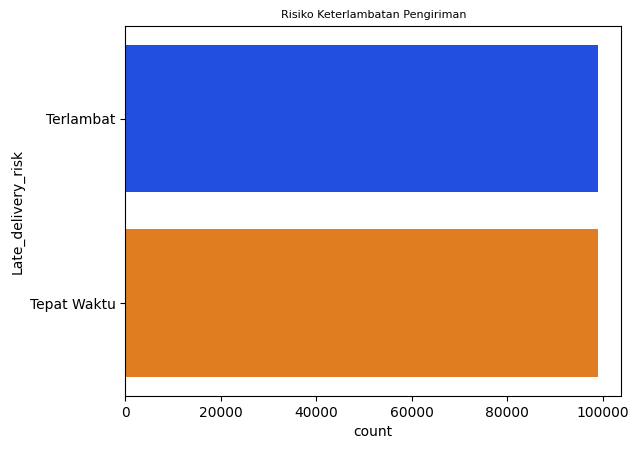

In [54]:
# Melihat proporsi data target setelah handling imbalance data
y['Late_delivery_risk'] = y['Late_delivery_risk'].map({
    0: 'Terlambat',
    1: 'Tepat Waktu',
})


def bar_chart(category, title):
    sns.countplot(data = y, y = y[category],order= y[category].value_counts().index, palette='bright')
    plt.title(title, size = 8)
    plt.show()

bar_chart("Late_delivery_risk","Risiko Keterlambatan Pengiriman")

In [55]:
y['Late_delivery_risk'] = y['Late_delivery_risk'].map({
    'Terlambat': 0,
    'Tepat Waktu': 1
})
y.head()

,Late_delivery_risk
0,0
1,1
2,0
3,0
4,0


  # <b><font color='black'>Training Machine Learning</font></b>
---
* Choose Best Score Model
* Kita harus mengalahkan benchmark/baseline

  # <b><font color='black'>Benchmark / Baseline</font></b>
---
- Baseline untuk evaluasi nanti
- Karena ini klasifikasi, bisa kita ambil dari proporsi kelas target yang terbesar
- Dengan kata lain, menebak hasil output keterlambatan pengiriman dengan nilai 0 atau TERLAMBAT semua tanpa modeling

In [56]:
y_train.value_counts(normalize = True)

# baseline akurasi = 54%

Late_delivery_risk
1                     0.548293
0                     0.451707
Name: proportion, dtype: float64

  # <b><font color='black'>Machine Learning Klasik</font></b>
---
Beberapa model yang kami gunakan:
* Tree-based models: Decision Tree, Random Forest, LightGBM, CatBoost, XGBoost
* Distance-based model: K-Nearest Neighbor (k=5)
* Linear Models: Support Vector Machine and Linear Discriminant Analysis 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 89079, number of negative: 89079
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017471 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5741
[LightGBM] [Info] Number of data points in the train set: 178158, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


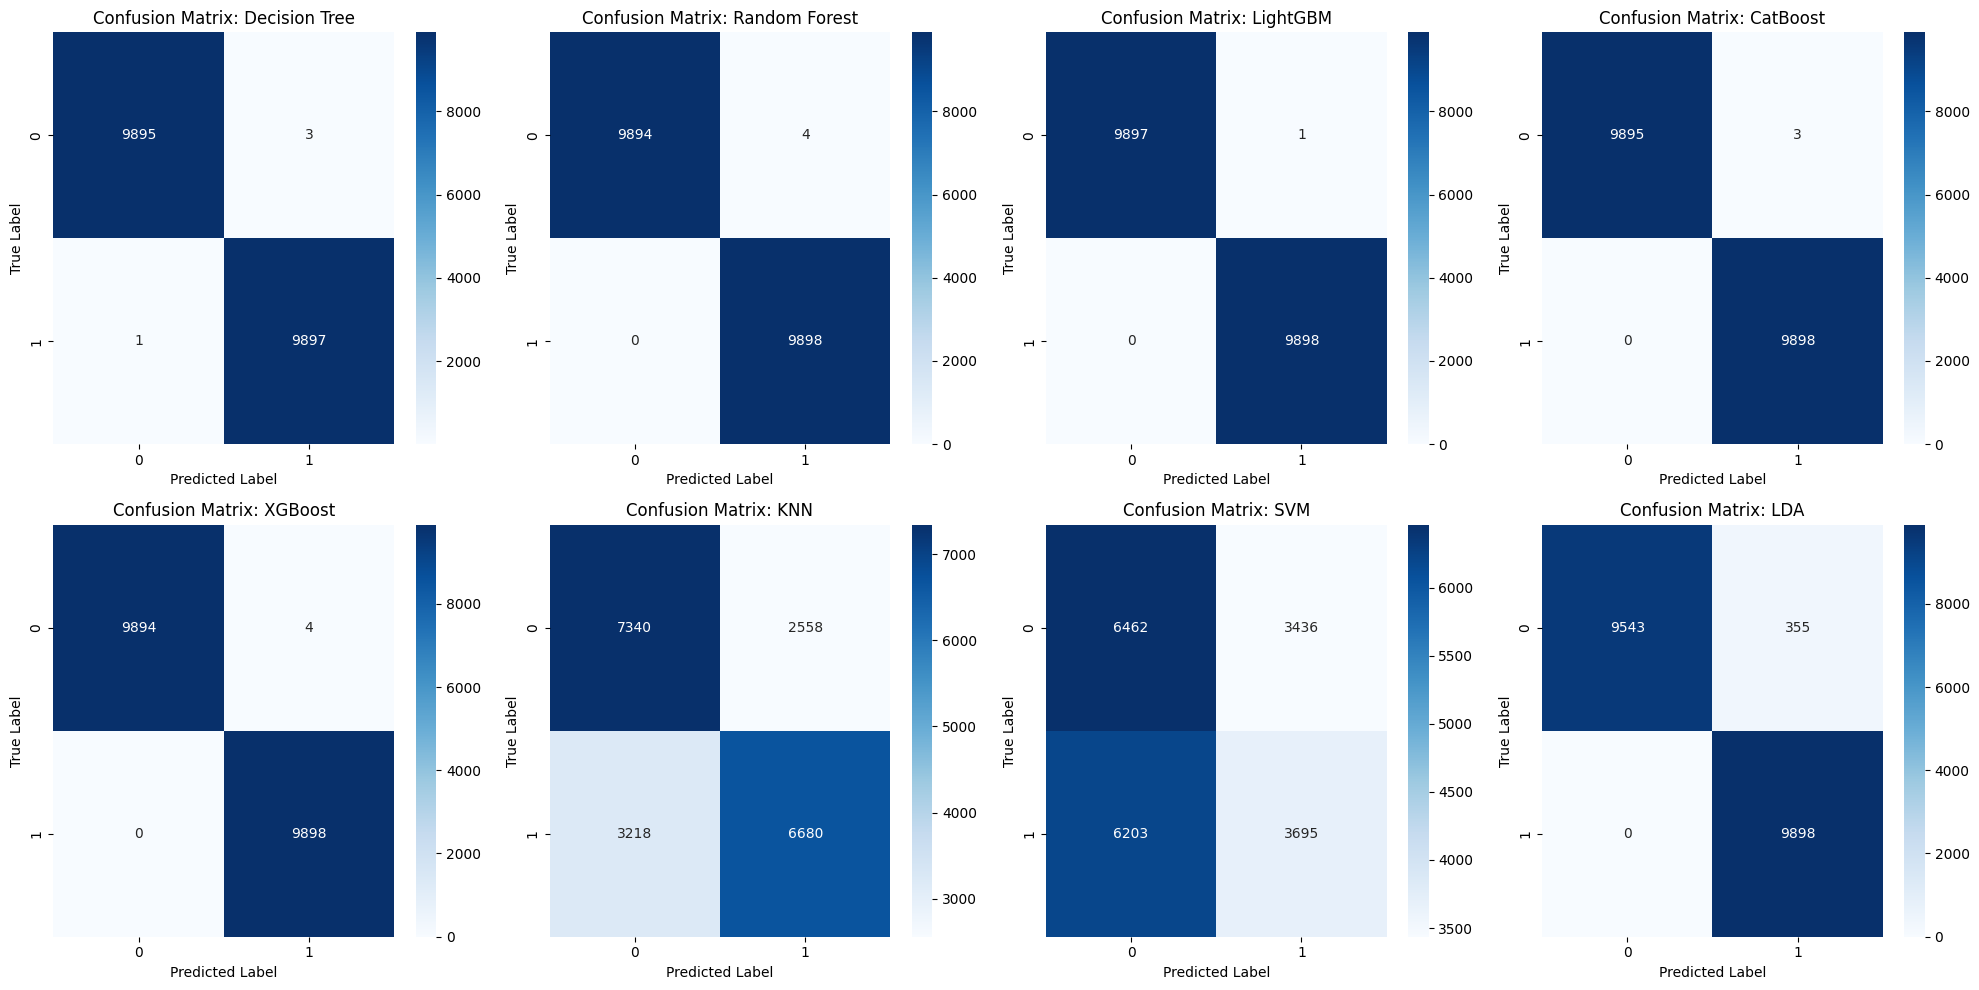

In [57]:
# Model yang digunakan
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(),
    "LDA": LinearDiscriminantAnalysis()
}

# List untuk menyimpan confusion matrix hasil
conf_matrices = {}

# Menggunakan fold pertama sebagai contoh
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    break  # Hanya mengambil fold pertama

# Train dan evaluasi setiap model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    conf_matrices[name] = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix dalam bentuk tabel
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for ax, (name, cm) in zip(axes, conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix: {name}')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

plt.tight_layout()
plt.show()

  # <b><font color='black'>Evaluation</font></b>
---
Evaluation digunakan untuk mengukur kinerja model pada dataset uji (test set). Proses ini bertujuan untuk memahami sejauh mana model mampu membuat prediksi yang akurat dan sesuai dengan tujuan dari masalah yang sedang diselesaikan. Pengukuran ini dilakukan menggunakan metrik evaluasi tertentu yang relevan dengan masalah yang dihadapi, seperti klasifikasi atau regresi. Dalam kasus ini, kami menggunakan confusion matrix: accuracy, precision, recall, dan F1-score.

![](https://www.researchgate.net/publication/367393140/figure/fig4/AS:11431281114710300@1674648981676/Confusion-matrix-Precision-Recall-Accuracy-and-F1-score.jpg)

Read more: [ConfusionMatrix](https://esairina.medium.com/memahami-confusion-matrix-accuracy-precision-recall-specificity-dan-f1-score-610d4f0db7cf)

In [58]:
# Dictionary untuk menyimpan hasil evaluasi
evaluation_results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

# Train dan evaluasi setiap model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Menghitung metrik evaluasi
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
    
    # Simpan hasil ke dalam dictionary
    evaluation_results["Model"].append(name)
    evaluation_results["Accuracy"].append(acc)
    evaluation_results["Precision"].append(precision)
    evaluation_results["Recall"].append(recall)
    evaluation_results["F1-Score"].append(f1)

# Konversi dictionary menjadi DataFrame
results_df = pd.DataFrame(evaluation_results)

# Menampilkan tabel hasil evaluasi
print(results_df)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 89079, number of negative: 89079
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5741
[LightGBM] [Info] Number of data points in the train set: 178158, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
           Model  Accuracy  Precision    Recall  F1-Score
0  Decision Tree  0.999798   0.999798  0.999798  0.999798
1  Random Forest  0.999798   0.999798  0.999798  0.999798
2       LightGBM  0.999949   0.999949  0.999949  0.999949
3       CatBoost  0.999848   0.999849  0.999848  0.999848
4        XGBoost  0.999798   0.999798  0.999798  0.999798
5            KNN  0.708224   0.709154  0.708224  0.707899
6         

In [59]:
# Melihat Hasil Akhir Prediksi
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,0.999798,0.999798,0.999798,0.999798
1,Random Forest,0.999798,0.999798,0.999798,0.999798
2,LightGBM,0.999949,0.999949,0.999949,0.999949
3,CatBoost,0.999848,0.999849,0.999848,0.999848
4,XGBoost,0.999798,0.999798,0.999798,0.999798
5,KNN,0.708224,0.709154,0.708224,0.707899
6,SVM,0.513083,0.514193,0.513083,0.503381
7,LDA,0.982067,0.982688,0.982067,0.982061


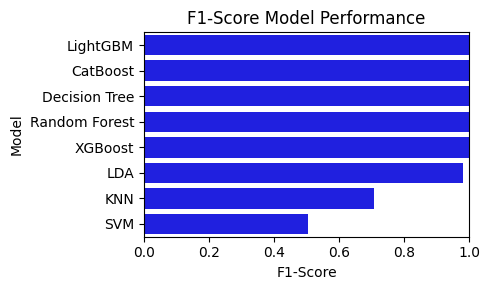

In [60]:
# Sorting results_df berdasarkan F1-Score secara descending
sorted_results_df = results_df.sort_values(by="F1-Score", ascending=False)

# Visualisasi bar chart kesamping
plt.figure(figsize=(5, 3))
sns.barplot(
    x="F1-Score", 
    y="Model", 
    data=sorted_results_df,
    palette=["blue"] * len(sorted_results_df)
)

plt.title("F1-Score Model Performance")
plt.xlabel("F1-Score")
plt.ylabel("Model")
plt.xlim(0, 1)  # F1-Score berada pada rentang [0, 1]
plt.tight_layout()
plt.show()

Beberapa literatur membahas bahwa pencapaian akurasi 100% dalam prediksi dapat menjadi indikasi overfitting. Misalnya, dalam buku "Overfitting, Underfitting and General Model Overconfidence and Under-Performance Pitfalls and Best Practices in Machine Learning and AI" disebutkan bahwa model yang terlalu akurat pada data pelatihan cenderung tidak mampu melakukan generalisasi dengan baik pada data baru, sehingga disebut overfitting. 

Model dengan F1-Score sempurna seperti Decision Tree, Random Forest, dan boosting models (LightGBM, CatBoost, XGBoost) kemungkinan besar overfit. Model kompleks cenderung mempelajari detail spesifik dari data uji, sehingga performanya tampak sempurna tetapi tidak mencerminkan generalisasi.


Read more: [E-book](https://link.springer.com/chapter/10.1007/978-3-031-39355-6_10?)

  # <b><font color='black'>Feature Importance</font></b>
---
Feature importance adalah teknik yang digunakan untuk mengidentifikasi dan memahami seberapa besar pengaruh masing-masing fitur terhadap prediksi model. Feature importance dapat diukur menggunakan berbagai metode, salah satunya adalah SHAP values.

SHAP (SHapley Additive exPlanations) values adalah metode berbasis teori permainan untuk menjelaskan kontribusi setiap fitur terhadap prediksi model. Dengan menggunakan SHAP values, kita dapat memahami seberapa besar pengaruh setiap fitur dalam mendukung atau mengurangi kemungkinan suatu prediksi tertentu. Dalam kasus ini, saya mengidentifikasi fitur menggunakan model LightGBM dengan TreeExplainer. Pada LightGBM, SHAP values dapat digunakan untuk menganalisis kontribusi setiap fitur secara mendetail baik pada level global (keseluruhan model) maupun level lokal (prediksi individu).

![](https://miro.medium.com/v2/resize:fit:1400/1*hzAZXuIihO2t5fQ63_87gw@2x.png)

Reference: [SHAP Values](https://youtu.be/9haIOplEIGM?si=nSkeeHNJMLU1Lgrl)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 89079, number of negative: 89079
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5741
[LightGBM] [Info] Number of data points in the train set: 178158, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


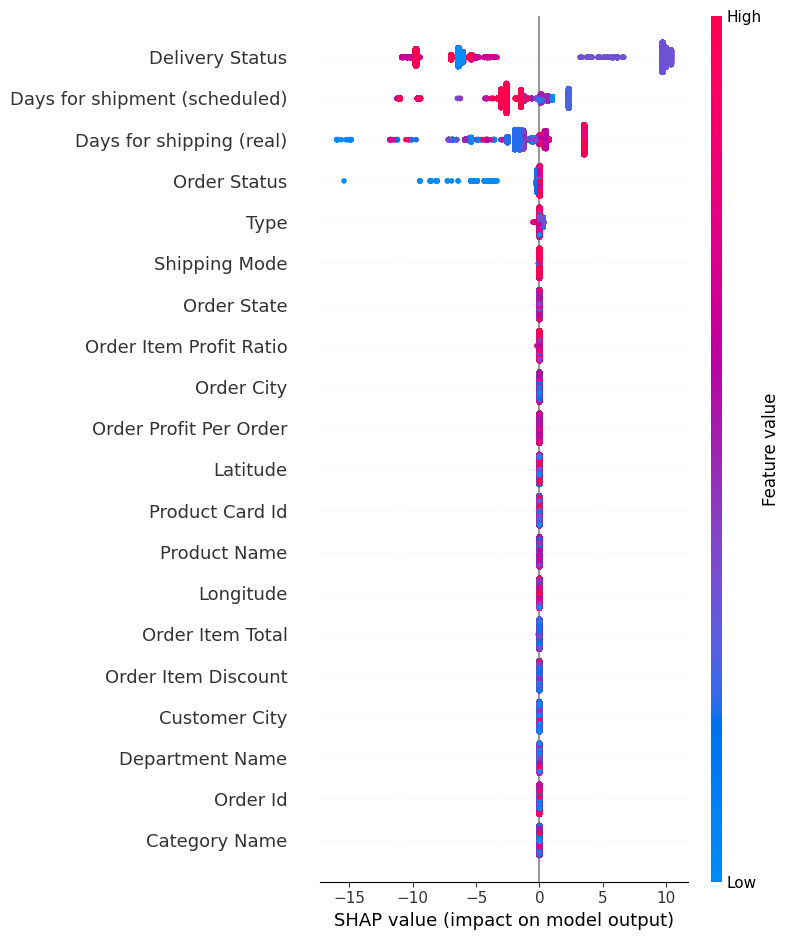

In [61]:
# Melatih hanya model LightGBM
lightgbm_model = LGBMClassifier(random_state=42)
lightgbm_model.fit(X_train, y_train)

# Membuat SHAP TreeExplainer
explainer = shap.TreeExplainer(lightgbm_model)

# Menghitung SHAP values untuk data test
shap_values = explainer.shap_values(X_test)

# Visualisasi distribusi SHAP values
shap.summary_plot(shap_values[1], X_test)

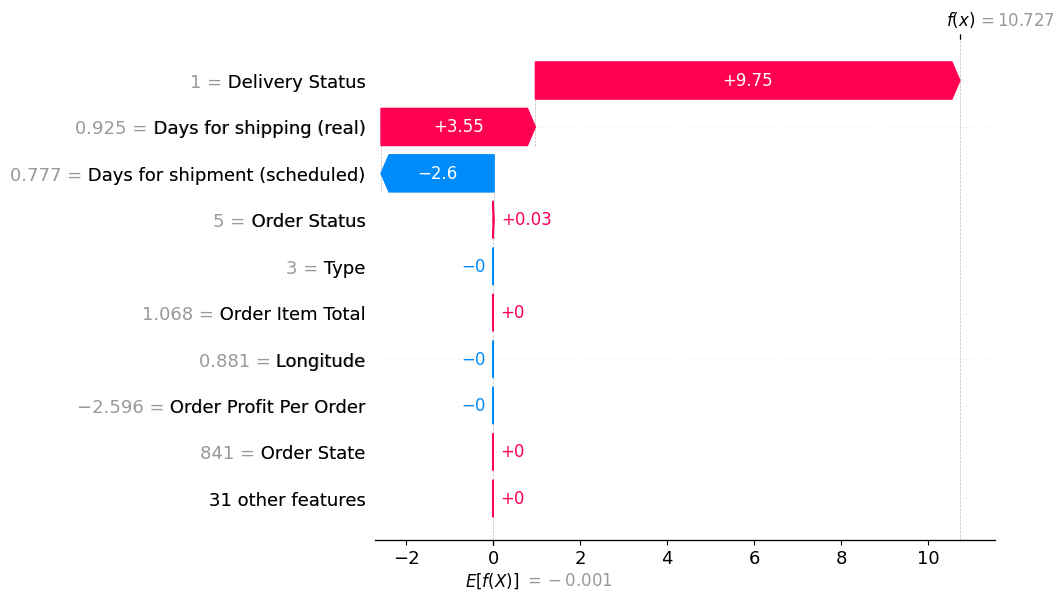

In [62]:
# Visualisasi waterfall plot untuk satu sampel
shap.waterfall_plot(shap.Explanation(values=shap_values[1][0], 
                                     base_values=explainer.expected_value[1], 
                                     data=X_test.iloc[0]))

  # <b><font color='black'>Deep Learning</font></b>
---
Deep learning adalah teknik pembelajaran mesin yang menggunakan jaringan saraf tiruan bertumpuk untuk mempelajari pola kompleks dalam data. Berbeda dengan machine learning, deep learning secara otomatis menangani proses ekstraksi fitur dan klasifikasi dalam satu arsitektur jaringan saraf yang mendalam. Pada machine learning, proses ekstraksi fitur biasanya dilakukan secara manual sebelum melanjutkan ke algoritma klasifikasi. Namun, pada deep learning, jaringan saraf mendalam secara otomatis mempelajari fitur yang relevan dari data mentah, membuatnya lebih efektif untuk menangani data yang kompleks seperti gambar, suara, atau teks tanpa perlu intervensi manusia yang signifikan.

Dalam kasus data rantai pasokan, deep learning dapat digunakan untuk memprediksi permintaan, mengoptimalkan rantai pasokan, atau menganalisis hubungan antar-entitas dalam jaringan supply chain menggunakan model seperti Graph Neural Networks (GNN). GNN memungkinkan analisis data graf untuk memahami hubungan antar node, seperti pemasok, distributor, dan konsumen.

![](https://pemrogramanmatlab.com/wp-content/uploads/2023/07/machine-learning-deep-learning-2.png)

Read more: [Deep Learning](https://www.ibm.com/think/topics/deep-learning)

  # <b><font color='black'>Graph Neural Network (GNN)</font></b>
---
Selain pendekatan machine learning klasik, kami juga menggunakan pendekatan deep learning. Pendekatan ini menggunakan arsitektur jaringan saraf tiruan (artificial neural networks) dengan banyak lapisan (multilayer), yang dikenal sebagai deep neural networks. Kami menggunakan salah satu model deep learning yang cukup hangat dibicarakan saat ini yaitu Graph Neural Network (GNN). Pemilihan GNN didasarkan pada kemampuan uniknya untuk menangkap pola relasional kompleks dalam data pengiriman, di mana hubungan antar entitas, seperti lokasi pengiriman, waktu pengiriman, dan pelanggan dapat direpresentasikan sebagai graf.

![](https://camo.githubusercontent.com/0f1cbf2109258892f77cccdfb08c0fc8a468ffd42797939b12d6e24f9edb40ee/68747470733a2f2f6769746875622d70726f64756374696f6e2d757365722d61737365742d3632313064662e73332e616d617a6f6e6177732e636f6d2f33383237383537392f3239313030303937362d35616238363865312d353663652d343765372d396561392d6362313762633534663935322e706e67)

  # <b><font color='black'>Graph Convolutional Network (GCN)</font></b>
---
Pada implementasi Graph Neural Network (GNN), kami memanfaatkan Graph Convolutional Network (GCN) sebagai subkelas utama untuk membangun model. GCN adalah salah satu jenis arsitektur GNN yang dirancang khusus untuk menangkap pola relasional antar node dalam graf melalui mekanisme propagasi pesan (message passing). Model GCN yang digunakan terdiri dari dua lapisan konvolusi. Lapisan pertama bertugas memproyeksikan fitur awal setiap node ke dimensi laten yang lebih representatif, sedangkan lapisan kedua digunakan untuk menghasilkan keluaran akhir berupa prediksi probabilitas untuk setiap kelas.

![](https://www.researchgate.net/profile/Chen-Jinyin/publication/337912776/figure/fig2/AS:945723902283782@1602489557437/The-architecture-of-LSTM-GCN-This-model-is-cascaded-by-multiple-LSTMs-which-can-learn.png)

Read more: [Graph Convolutional Network FASILKOM UI](https://youtu.be/8ZrTWdF9xjs?si=ijXdVZ-S3rb4L_8G)

  # <b><font color='black'>Deep Learning Pre-processing</font></b>
---
Preprocessing tetap penting dalam deep learning untuk memastikan data bersih, relevan, dan terstruktur dengan baik. Langkah seperti imputasi, encoding, dan mengatasi nilai yang hilang dapat membantu model belajar lebih efektif dan mencegah bias atau kesalahan selama pelatihan. Meskipun deep learning dapat mengekstrak fitur secara otomatis, kualitas data tetap menjadi kunci keberhasilan.

In [4]:
# Load dataset dan simpan dalam variabel "df"

# Kaggle
df = pd.read_csv("/kaggle/input/dataset-kedua/Dataset Kedua.csv", encoding='ISO-8859-1')

# Local colab
# df = pd.read_csv("/content/Dataset Kedua.csv", encoding='ISO-8859-1')

df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [5]:
# Drop Feature Redundancy
columns_to_drop = [
    "Benefit per order", 
    "Sales per customer", 
    "Category Id", 
    "Order Customer Id", 
    "Order Item Id", 
    "Order Item Cardprod Id", 
    "Order Item Product Price"
]

# Looping untuk drop kolom
for col in columns_to_drop:
    df.drop(col, axis=1, inplace=True)

# Cek hasilnya
print("Kolom yang tersisa setelah feature selection: ")
df.head()

Kolom yang tersisa setelah feature selection: 


,Type,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,order date (DateOrders),Order Id,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,1/31/2018 22:56,77202,13.110000,0.04,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,1/13/2018 12:27,75939,16.389999,0.05,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,Shipping on time,0,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,1/13/2018 12:06,75938,18.030001,0.06,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,Advance shipping,0,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,1/13/2018 11:45,75937,22.940001,0.07,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,1/13/2018 11:24,75936,29.500000,0.09,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [6]:
# Menghapus kolom 'Product Description' dan 'Order Zipcode'
df = df.drop(columns=['Product Description', 'Order Zipcode', 'Customer Lname', 'Customer Street'], errors='ignore')

# Menampilkan data terbaru
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Password,Customer Segment,Customer State,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,order date (DateOrders),Order Id,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,XXXXXXXXX,Consumer,PR,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,1/31/2018 22:56,77202,13.110000,0.04,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,XXXXXXXXX,Consumer,PR,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,1/13/2018 12:27,75939,16.389999,0.05,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,Shipping on time,0,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,XXXXXXXXX,Consumer,CA,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,1/13/2018 12:06,75938,18.030001,0.06,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,Advance shipping,0,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,XXXXXXXXX,Home Office,CA,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,1/13/2018 11:45,75937,22.940001,0.07,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,XXXXXXXXX,Corporate,PR,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,1/13/2018 11:24,75936,29.500000,0.09,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [7]:
# Memisahkan fitur numerik dan kategorik
df_numerical = df._get_numeric_data() 
df_categorical = df.drop(list(df_numerical.columns.values), axis=1)

In [8]:
# Konversi tipe data waktu
df_categorical["order date (DateOrders)"] = pd.to_datetime(df_categorical["order date (DateOrders)"], errors='coerce')
df_categorical["shipping date (DateOrders)"] = pd.to_datetime(df_categorical["shipping date (DateOrders)"], errors='coerce')

# Konversi Order Date
df_categorical["Order_Year"] = df_categorical["order date (DateOrders)"].dt.year
df_categorical["Order_Month"] = df_categorical["order date (DateOrders)"].dt.month
df_categorical["Order_Day"] = df_categorical["order date (DateOrders)"].dt.day

# Konversi Shipping Date
df_categorical["Shipping_Year"] = df_categorical["shipping date (DateOrders)"].dt.year
df_categorical["Shipping_Month"] = df_categorical["shipping date (DateOrders)"].dt.month
df_categorical["Shipping_Day"] = df_categorical["shipping date (DateOrders)"].dt.day

# Hapus kolom datetime asli
df_categorical.drop(columns=["order date (DateOrders)", "shipping date (DateOrders)"], inplace=True)

In [9]:
# Inisialisasi LabelEncoder untuk setiap kolom kategori
label_encoders = {}
for col in df_categorical.columns:
    if col not in ['Order_Year', 'Order_Month', 'Order_Day', 'Shipping_Year', 'Shipping_Month', 'Shipping_Day']:
        
        # Konversi ke string
        df_categorical[col] = df_categorical[col].astype(str)
        le = LabelEncoder()
        df_categorical[col] = le.fit_transform(df_categorical[col])
        
        # Simpan encoder jika diperlukan untuk inverse transform
        label_encoders[col] = le

df_categorical.head()

,Type,Delivery Status,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Password,Customer Segment,Customer State,Department Name,Market,Order City,Order Country,Order Region,Order State,Order Status,Product Image,Product Name,Shipping Mode,Order_Year,Order_Month,Order_Day,Shipping_Year,Shipping_Month,Shipping_Day
0,1,0,40,66,1,0,109,0,0,36,4,3,331,70,15,475,2,78,78,3,2018,1,31,2018,2,3
1,3,1,40,66,1,0,311,0,0,36,4,3,391,69,13,841,5,78,78,3,2018,1,13,2018,1,18
2,0,3,40,452,0,0,249,0,0,5,4,3,391,69,13,841,1,78,78,3,2018,1,13,2018,1,17
3,1,0,40,285,0,0,707,0,2,5,4,3,3226,8,11,835,2,78,78,3,2018,1,13,2018,1,16
4,2,0,40,66,1,0,570,0,1,36,4,3,3226,8,11,835,6,78,78,3,2018,1,13,2018,1,15


In [10]:
# Menyatukan kembali numerik dan kategorik
df = pd.concat([df_numerical, df_categorical], axis = 1)
df.head()

,Days for shipping (real),Days for shipment (scheduled),Late_delivery_risk,Customer Id,Customer Zipcode,Department Id,Latitude,Longitude,Order Id,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Card Id,Product Category Id,Product Price,Product Status,Type,Delivery Status,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Password,Customer Segment,Customer State,Department Name,Market,Order City,Order Country,Order Region,Order State,Order Status,Product Image,Product Name,Shipping Mode,Order_Year,Order_Month,Order_Day,Shipping_Year,Shipping_Month,Shipping_Day
0,3,4,0,20755,725.0,2,18.251453,-66.037056,77202,13.110000,0.04,0.29,1,327.75,314.640015,91.250000,1360,73,327.75,0,1,0,40,66,1,0,109,0,0,36,4,3,331,70,15,475,2,78,78,3,2018,1,31,2018,2,3
1,5,4,1,19492,725.0,2,18.279451,-66.037064,75939,16.389999,0.05,-0.80,1,327.75,311.359985,-249.089996,1360,73,327.75,0,3,1,40,66,1,0,311,0,0,36,4,3,391,69,13,841,5,78,78,3,2018,1,13,2018,1,18
2,4,4,0,19491,95125.0,2,37.292233,-121.881279,75938,18.030001,0.06,-0.80,1,327.75,309.720001,-247.779999,1360,73,327.75,0,0,3,40,452,0,0,249,0,0,5,4,3,391,69,13,841,1,78,78,3,2018,1,13,2018,1,17
3,3,4,0,19490,90027.0,2,34.125946,-118.291016,75937,22.940001,0.07,0.08,1,327.75,304.809998,22.860001,1360,73,327.75,0,1,0,40,285,0,0,707,0,2,5,4,3,3226,8,11,835,2,78,78,3,2018,1,13,2018,1,16
4,2,4,0,19489,725.0,2,18.253769,-66.037048,75936,29.500000,0.09,0.45,1,327.75,298.250000,134.210007,1360,73,327.75,0,2,0,40,66,1,0,570,0,1,36,4,3,3226,8,11,835,6,78,78,3,2018,1,13,2018,1,15


array([[<Axes: title={'center': 'Days for shipping (real)'}>,
        <Axes: title={'center': 'Days for shipment (scheduled)'}>,
        <Axes: title={'center': 'Late_delivery_risk'}>,
        <Axes: title={'center': 'Customer Id'}>,
        <Axes: title={'center': 'Customer Zipcode'}>,
        <Axes: title={'center': 'Department Id'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Order Id'}>,
        <Axes: title={'center': 'Order Item Discount'}>,
        <Axes: title={'center': 'Order Item Discount Rate'}>,
        <Axes: title={'center': 'Order Item Profit Ratio'}>,
        <Axes: title={'center': 'Order Item Quantity'}>,
        <Axes: title={'center': 'Sales'}>],
       [<Axes: title={'center': 'Order Item Total'}>,
        <Axes: title={'center': 'Order Profit Per Order'}>,
        <Axes: title={'center': 'Product Card Id'}>,
        <Axes: title={'center': 'Product Category Id'}>,
        <Axes: t

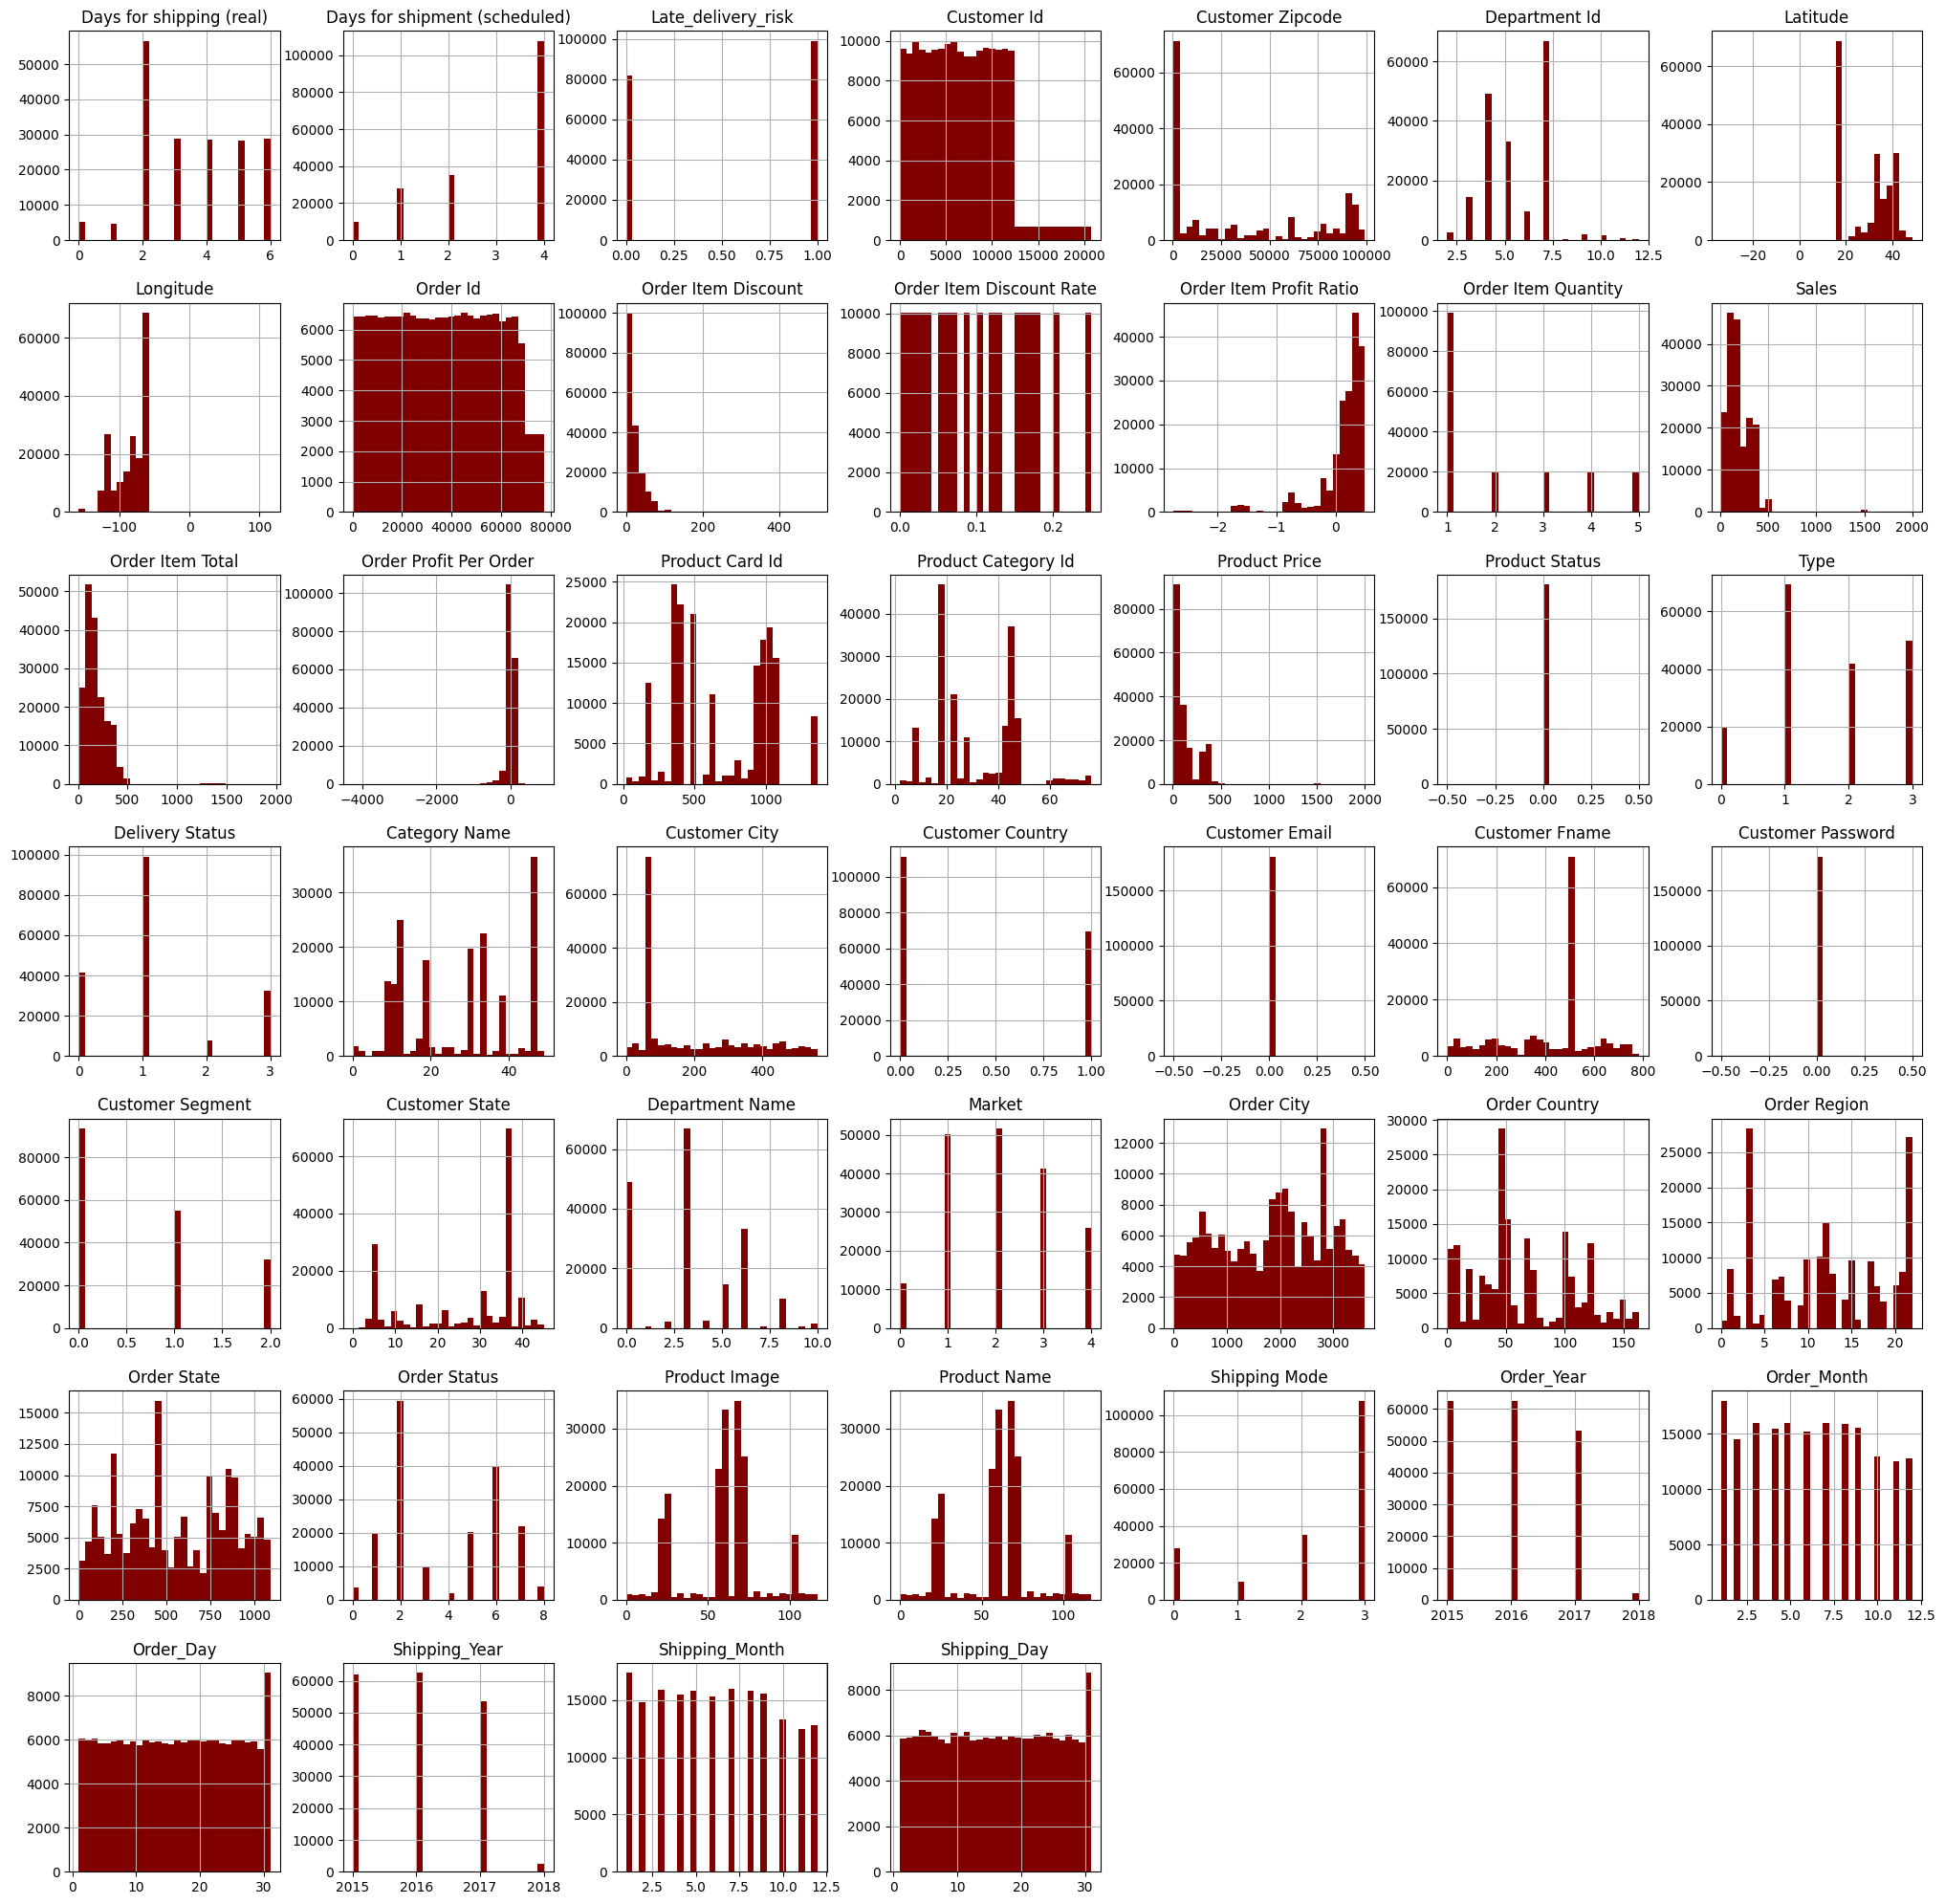

In [11]:
# Melihat sebaran data
df.hist(bins=30, figsize=(25,25), color="maroon")

In [12]:
# Imputasi nilai yang hilang dengan KNN Imputer
df["Customer Zipcode"] = pd.to_numeric(df["Customer Zipcode"], errors='coerce')

imputer = KNNImputer(n_neighbors=5)

# Imputasi hanya untuk kolom Customer Zipcode
df["Customer Zipcode"] = imputer.fit_transform(df[["Customer Zipcode"]])

In [13]:
# Sanity cek
df.isna().sum()

Days for shipping (real)         0
Days for shipment (scheduled)    0
Late_delivery_risk               0
Customer Id                      0
Customer Zipcode                 0
Department Id                    0
Latitude                         0
Longitude                        0
Order Id                         0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Profit Ratio          0
Order Item Quantity              0
Sales                            0
Order Item Total                 0
Order Profit Per Order           0
Product Card Id                  0
Product Category Id              0
Product Price                    0
Product Status                   0
Type                             0
Delivery Status                  0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Email                   0
Customer Fname                   0
Customer Password                0
Customer Segment    

In [14]:
# Drop target variable
target = 'Late_delivery_risk'
features = [col for col in df.columns if col != target]

In [15]:
# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(df[features])
y = df[target].values

In [16]:
# Spilitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [17]:
# Konversi data menjadi tensor untuk pipeline deep learning dengan PyTorch
X_train = torch.tensor(X_train, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float)
y_test = torch.tensor(y_test, dtype=torch.long)

In [18]:
# Membuat matriks ketetanggaan graf berbasis KNN
def create_adjacency_matrix(X, k=5):
    adj = kneighbors_graph(X, k, mode='connectivity', include_self=True).toarray()
    edge_index = np.array(np.nonzero(adj))
    return torch.tensor(edge_index, dtype=torch.long)

edge_index = create_adjacency_matrix(X_train.numpy())

data = Data(x=X_train, edge_index=edge_index, y=y_train)

  # <b><font color='black'>Activation Function: Tanh</font></b>
---
Fungsi aktivasi adalah komponen penting dalam jaringan saraf tiruan (neural networks) yang menentukan bagaimana sinyal input diubah menjadi output di setiap neuron. Tanpa fungsi aktivasi, jaringan saraf hanya akan mampu memodelkan hubungan linear, terlepas dari berapa banyak lapisan yang ditambahkan. Dengan fungsi aktivasi, jaringan saraf dapat memodelkan hubungan non-linear, yang sangat penting untuk memecahkan masalah dunia nyata seperti pengenalan gambar, prediksi data, atau klasifikasi teks.

Salah satu fungsi aktivasi yang kami gunakan adalah fungsi aktivasi Tanh. Fungsi aktivasi tanh digunakan dalam kasus prediksi keterlambatan pengiriman pada dataset supply chain karena memiliki karakteristik yang sesuai dengan permasalahan ini. Salah satu alasan utamanya adalah bahwa fungsi tanh menghasilkan nilai output dalam rentang [−1,1], yang memungkinkannya menangani data dengan distribusi yang mencakup nilai negatif dan positif, seperti perbedaan waktu pengiriman terhadap rata-rata.  Meskipun tanh menghasilkan output dalam rentang [−1,1], pendekatan ini masih masuk akal karena output jaringan dapat diinterpretasikan sebagai skor atau nilai aktivasi yang diubah menjadi probabilitas setelah mengaplikasikan ambang batas (threshold) untuk memutuskan apakah hasilnya adalah 0 atau 1.

![](https://miro.medium.com/v2/resize:fit:1358/0*3ChsNLtIRjGGv3MN.png)

Read more: [Tanh](https://medium.com/@baguspurnama/3-fungsi-aktivasi-favorit-neural-network-25931a2f8817)

Arsitektur Model menggunakan 3 layer berbasis GCN dengan arsitektur sebagai berikut:

- Layer 1: GCNConv → BatchNorm → ReLU → Dropout

- Layer 2: GCNConv → BatchNorm → ReLU → Dropout

- Layer 3: GCNConv → Tanh

Batch normalization diterapkan untuk menstabilkan distribusi aktivasi, sementara dropout digunakan untuk mengurangi risiko overfitting dengan probabilitas 30%.

![](https://storage.googleapis.com/kaggle-media/learn/images/a86utxY.gif)

Read more: [Dropout and Batch Normalization](https://medium.com/data-science/batch-normalization-and-dropout-in-neural-networks-explained-with-pytorch-47d7a8459bcd)

In [19]:
class GNNModel(torch.nn.Module):
    """
    GNNModel adalah model berbasis Graph Convolutional Network (GCN) dengan 2 layer.
    Model ini menggunakan fungsi aktivasi ReLU di hidden layer pertama dan Tanh di output layer terakhir.
    Ditambahkan Batch Normalization dan Dropout untuk meningkatkan stabilitas dan generalisasi model.

    Parameter:
    - in_features: Jumlah fitur input untuk setiap node.
    - hidden_dim: Dimensi (jumlah neuron) dari hidden layer.
    - dropout_rate: Probabilitas dropout untuk mencegah overfitting.

    Arsitektur:
    - Layer 1: GCNConv -> BatchNorm -> ReLU -> Dropout
    - Layer 2: GCNConv -> Aktivasi Tanh (untuk output dalam rentang [-1, 1])
    """
    def __init__(self, in_features, hidden_dim, dropout_rate=0.3):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(in_features, hidden_dim)
        
        # Batch Normalization setelah GCNConv pertama
        self.batch_norm1 = BatchNorm1d(hidden_dim)
        
        # Dropout setelah aktivasi ReLU
        self.dropout = Dropout(dropout_rate)
        
        # Output layer dengan 1 neuron
        self.conv2 = GCNConv(hidden_dim, 1)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        
        # Normalisasi batch setelah konvolusi pertama
        x = self.batch_norm1(x)

        # Aktivasi ReLU
        x = F.relu(x)
        
        # Dropout sebelum masuk layer berikutnya
        x = self.dropout(x)
        
        x = self.conv2(x, edge_index)
        
        # Aktivasi Tanh di output layer
        return torch.tanh(x)

In [20]:
# Initialize model with best hyperparameters
model = GNNModel(in_features=X_train.shape[1], hidden_dim=64)
optimizer = torch.optim.Adam(model.parameters(), lr=0.05, weight_decay=5e-4)

"""
Best Hyperparameters: 
Learning Rate (LR) = 0.05
Hidden Dimension = 64
Weight Decay (WD) = 0.0005
Dropout = 0.0
"""

'\nBest Hyperparameters: \nLearning Rate (LR) = 0.05\nHidden Dimension = 64\nWeight Decay (WD) = 0.0005\nDropout = 0.0\n'

  # <b><font color='black'>Loss Function: Binary Cross-Entropy </font></b>
---

Loss function atau fungsi kerugian adalah komponen utama dalam pelatihan model yang digunakan untuk mengukur seberapa baik atau buruk model memprediksi hasil dibandingkan dengan nilai sebenarnya. Ketika sebuah model machine learning membuat prediksi, sering kali hasil prediksi tidak langsung sesuai dengan nilai target atau ground truth. Loss function menghitung perbedaan antara nilai prediksi dan nilai target, sehingga memberikan angka yang mencerminkan seberapa besar kesalahan model tersebut. Secara umum, semakin kecil nilai loss function, semakin baik model bekerja dan mendekati ground truth.

Terdapat berbagai jenis loss function yang dirancang untuk menangani berbagai jenis masalah. Dalam kasus ini, masalah yang dihadapi adalah klasifikasi, oleh sebab itu, kami menggunakan pendekatan \textit{Binary Cross-Entropy} (BCE). Fungsi ini bekerja dengan memberikan penalti yang besar jika model memprediksi probabilitas yang jauh dari target aktual. Misalnya, jika target 𝑦=1 tetapi model memprediksi 𝑦=0.2, nilai BCE akan menjadi besar karena prediksi tersebut tidak mendekati target. Sebaliknya, jika model memprediksi 𝑦=0.9, nilai BCE akan kecil karena prediksi tersebut lebih mendekati target. BCE bekerja dengan membandingkan nilai probabilitas keluaran model (biasanya dalam rentang [0, 1], yang dihasilkan oleh fungsi aktivasi seperti sigmoid) dengan label aktual (0 atau 1) yang sesuai dengan kasus penelitian ini.

![](https://arize.com/wp-content/uploads/2022/11/log-loss-1.png)

Read more: [Binary Cross-Entropy](https://www.analyticsvidhya.com/blog/2021/03/binary-cross-entropy-log-loss-for-binary-classification/)

Epoch 0, Loss: 0.7325
Epoch 10, Loss: 0.3852
Epoch 20, Loss: 0.3757
Epoch 30, Loss: 0.3733
Epoch 40, Loss: 0.3721
Epoch 50, Loss: 0.3719
Epoch 60, Loss: 0.3716
Epoch 70, Loss: 0.3709
Epoch 80, Loss: 0.3701
Epoch 90, Loss: 0.3699
Epoch 100, Loss: 0.3696
Epoch 110, Loss: 0.3692
Epoch 120, Loss: 0.3685
Epoch 130, Loss: 0.3705
Epoch 140, Loss: 0.3691
Epoch 150, Loss: 0.3682
Epoch 160, Loss: 0.3676
Epoch 170, Loss: 0.3699
Epoch 180, Loss: 0.3689
Epoch 190, Loss: 0.3677
Training complete.


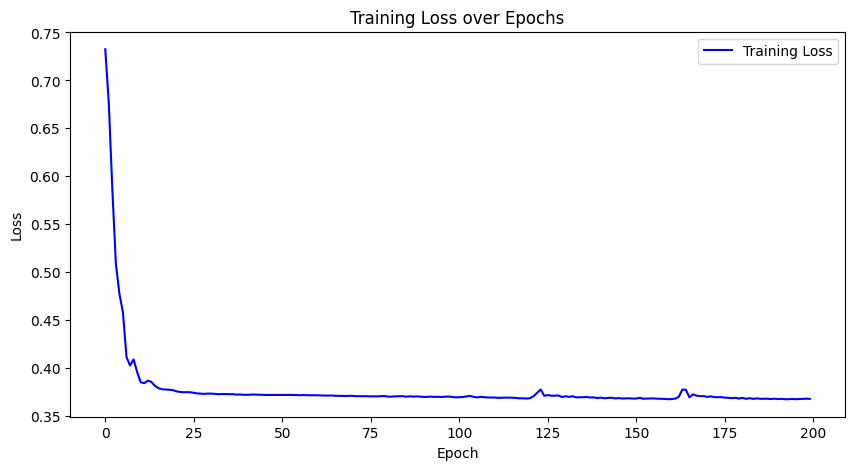

In [21]:
# Fungsi Kerugian dengan Binary Cross-Entropy
losses = []

def train():
    model.train()
    optimizer.zero_grad()
    
    # Forward pass
    out = model(data.x, data.edge_index).squeeze()
    
    # Binary Cross-Entropy Loss dalam rentang [0, 1]
    target_scaled = data.y.float() 

    # Menggunakan BCE dengan logits
    loss = F.binary_cross_entropy_with_logits(out, target_scaled)  
    loss.backward()
    optimizer.step()
    return loss.item()

# Training Loop
for epoch in range(200):
    loss = train()
    losses.append(loss)
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss:.4f}')

print("Training complete.")

# Plot Training Loss
plt.figure(figsize=(10, 5))
plt.plot(range(200), losses, label='Training Loss', color='b')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

In [23]:
# Evaluasi Model 
def evaluate():
    model.eval()
    with torch.no_grad():
        # Forward pass pada data uji
        out = model(data.x, data.edge_index).squeeze()
        
        # Rescale Tanh output dari [-1, 1] ke [0, 1]
        probs = (out + 1) / 2  
        
        # Prediksi (threshold 0.5 untuk probabilitas biner)
        preds = (probs > 0.5).float().cpu().numpy()
        
        # Evaluasi metrik
        y_true = data.y.cpu().numpy()
        acc = accuracy_score(y_true, preds)
        precision = precision_score(y_true, preds, average='binary', zero_division=1)
        recall = recall_score(y_true, preds, average='binary', zero_division=1)
        f1 = f1_score(y_true, preds, average='binary', zero_division=1)
        
        print(f'Accuracy: {acc:.4f}')
        print(f'Precision: {precision:.4f}')
        print(f'Recall: {recall:.4f}')
        print(f'F1 Score: {f1:.4f}')

# Jalankan evaluasi
evaluate()

Accuracy: 0.9442
Precision: 0.9382
Recall: 0.9616
F1 Score: 0.9498


  # <b><font color='black'>Simpan Model</font></b>
---
Untuk memastikan reproduktifitas, kami menyimpan model ke dalam pth dengan menggunakan library torch.

In [82]:
# Simpan model beserta arsitekturnya
torch.save({
    'model_state_dict': model.state_dict(),
    'hyperparameters': {
        'input_dim': X_train.shape[1],
        'hidden_dim': 64,
        'output_dim': 1,
        'dropout': 0.0,
    }
}, 'gnn_model.pth')

print("GNN model saved successfully!")

GNN model saved successfully!


  # <b><font color='black'>Kesimpulan</font></b>
---

Berdasarkan semua yang telah kami lakukan:  
1. Mengolah data graph untuk membangun representasi yang sesuai dengan model Graph Neural Network (GNN), termasuk menyiapkan fitur node, edge index, dan label data.  
2. Melakukan proses *hyperparameter tuning* untuk menentukan kombinasi parameter terbaik yang mencakup *learning rate*, dimensi tersembunyi, *weight decay*, dan *dropout*, sehingga menghasilkan performa optimal.  
3. Mengevaluasi berbagai model pembelajaran mesin seperti Decision Tree, Random Forest, LightGBM, dan lainnya, dengan menggunakan metrik seperti Accuracy, Precision, Recall, dan F1 Score, di mana beberapa model menunjukkan performa sempurna namun cenderung mengalami *overfitting*.  
4. Melatih model Graph Neural Network (GNN) menggunakan parameter terbaik dan melakukan rescaling output dari fungsi aktivasi untuk menghasilkan probabilitas yang sesuai dengan tugas klasifikasi.  
5. Mengukur performa model GNN dengan menggunakan metrik evaluasi yang sama dan membandingkannya dengan model pembelajaran mesin.  
6. Menghasilkan prediksi dan menarik kesimpulan dari seluruh proses, di mana model GNN memberikan hasil yang kompetitif dengan pendekatan berbasis *graph* yang mampu menangkap hubungan kompleks antar node dalam data.

- Preparasi Data Graf: Kami berhasil membangun representasi graf yang komprehensif untuk model GNN, meliputi penyusunan fitur node, edge index, dan label data secara sistematis. Proses ini menjadi fondasi penting untuk analisis lebih lanjut.

- Optimasi Model: Melalui hyperparameter tuning yang ketat, kami menentukan konfigurasi optimal dengan learning rate 0.05, dimensi tersembunyi 64, dan weight decay 0.0005. Proses ini memastikan model bekerja pada performa terbaiknya.

- Evaluasi Komparatif: Berbagai model machine learning tradisional dievaluasi secara menyeluruh. Meskipun beberapa model seperti Decision Tree dan LightGBM menunjukkan akurasi sempurna (99.98%), terdapat indikasi overfitting yang perlu diwaspadai.

- Implementasi GNN: Model GNN berhasil diimplementasikan dengan parameter terbaik, termasuk proses rescaling output untuk menghasilkan probabilitas klasifikasi yang akurat. Pendekatan berbasis graf ini menunjukkan kemampuan unik dalam menangkap hubungan kompleks antar node.

- Analisis Performa: GNN mencapai hasil yang kompetitif (akurasi 94.65%, F1-score 95.17%), dengan keunggulan khusus dalam memahami relasi struktural yang tidak terlihat oleh model tradisional.

- Pemilihan Model: Meskipun LDA menunjukkan akurasi tinggi (98%), GNN dipilih karena kemampuannya yang unik dalam memodelkan ketergantungan struktural data graf. Keunggulan ini membuat GNN lebih sesuai untuk aplikasi dunia nyata yang kompleks.

Kami menyadari bahwa setiap pendekatan memiliki kelebihan dan keterbatasannya masing-masing. Pemilihan GNN didasarkan pada pertimbangan mendalam tentang kebutuhan spesifik analisis jaringan logistik, di mana pemahaman hubungan antar entitas menjadi faktor kritis.

Sebelum mengakhiri catatan analisis ini, kami ingin mengucapkan terima kasih yang sebesar-besarnya kepada tim penyelenggara dan panitia kompetisi yang telah memberikan kesempatan yang luar biasa ini. Terima kasih atas dedikasi dan kerja keras Anda dalam menyukseskan acara ini!

---

<div align="center">
    
  # <span style="color:orange;">**Himam, Agung, Fito**</span>
  #### <span style="color:black;">Signing Out!</span>


</div>